# COMP0124 MAAI Individual Coursework 

This 50-point individual coursework has four parts,
the Matrix Game, the Stochastic Game, the Nonzero-sum Game and Deep Multi-Agent Reinforcement Learning.

## Instructions
1.   To start this CW, please duplicate this notebook at first:
  - Choose "File => Save a copy in Drive" and open/run it in Colab.
  - Or you can download the notebook and run it in your local jupyter notebook server.
2.   For the coding assignment, please write your code at `### TODO ###` blocks or in a new cell. For analysis report, you are free to use as many blocks as you need.
3.   Before submitting your notebook, **make sure that it runs without errors**, we also provide a validation tool in the end of this notebook.
  - To check this, reload your notebook and the Python kernel, and run the notebook from the first to the last cell.
  - Please do not change any methods or variables' name in the notebook, otherwise, you cannot get marking correctly.
  - We would not help you debug the code, if we cannot run your submitted notebook, you will get zero point. 
4.  Download your notebook and submit it on Moodle.
  - Click on "File -> Download .ipynb".
  - Rename your notebook to ***firstname_lastname_studentnumber.ipynb***. (Please strictly follow the naming requirement.)
  - Upload to Moodle.
5. This CW would due by **23:55 26/03/2021**, please submit your .ipynb file through the [submission entrance](https://moodle.ucl.ac.uk/mod/assign/view.php?id=1685901).
6. If you have any questions, please contact TAs: [Minne Li](minne.li@cs.ucl.ac.uk), [Oliver Slumbers](o.slumbers@cs.ucl.ac.uk), [Xihan Li](xihan.li.20@ucl.ac.uk), [Xidong Feng](xidong.feng@cs.ucl.ac.uk), and [Mengyue Yang](m.yang@cs.ucl.ac.uk).

## Part I: Matrix Game (10 points)

We start with the simplest setting: Matrix Game (a.k.a Stage Game/Normal Form Game). In this part, you will try to solve the matrix game with full knowledge of the payoff for each player in the game.



Given a two-player, two-action matrix game, we have the payoff matrices as follows:
$$
\mathbf{R}^1 = \left[\begin{matrix}
0 & 3 \\
1 &2
\end{matrix}\right] 
\quad 
\mathbf{R}^2 = \left[\begin{matrix}
3 & 2 \\
0 & 1
\end{matrix}\right]
$$

Each player selects an action from the action space $\{1,2\}$ which determines the payoffs to the players. If the player 1 chooses action $i$ and the player 2 chooses action $j$, then the player 1 and player2 receive the rewards $r^1_{ij}$ and $r^2_{ij}$ respectively. For example, if both players choose action $1$, then the player 1 would have $r^1_{11}=0$ and player 1 would receive $r^2_{11}=3$.

Then, we can use $\alpha\in [0,1] $ represents the strategy for player 1, where $\alpha$ corresponds to the probability of player 1 selecting the first action (action 1), and $1-\alpha$ is the probability of choosing the second action (action 2). Similarly, we use $\beta$ to be the strategy for player 2.

Given the pair of strategies $(\alpha, \beta)$, we can have the expected payoffs for two players. Denote $V^1(\alpha, \beta)$ and $V^2(\alpha, \beta)$ as the expected payoffs for two players respectively:

$$
\begin{aligned} V^{1}(\alpha, \beta) &=\alpha \beta r^1_{11}+\alpha(1-\beta) r^1_{12}+(1-\alpha) \beta r^1_{21}+(1-\alpha)(1-\beta) r^1_{22} \\ &=u^1 \alpha \beta+\alpha\left(r^1_{12}-r^1_{22}\right)+\beta\left(r_{21}-r^1_{22}\right)+r^1_{22} \end{aligned}
$$
$$
\begin{aligned} V^{2}(\alpha, \beta) &=\alpha \beta r^2_{11}+\alpha(1-\beta) r^2_{12}+(1-\alpha) \beta r^2_{21}+(1-\alpha)(1-\beta) r^2_{22} \\ &=u^2 \alpha \beta+\alpha\left(r^2_{12}-r^2_{22}\right)+\beta\left(r_{21}-r^2_{22}\right)+r^2_{22}\end{aligned}
$$

where

$$
\begin{aligned} u^1 &=r^1_{11}-r^1_{12}-r^1_{21}+r^1_{22} \\  u^2 &=r^2_{11}-r^2_{12}-r^2_{21}+r^2_{22} .\end{aligned}
$$



#### Set up matrix game (4 points)



In [1]:
import numpy as np
from copy import deepcopy


def U(payoff):
    ########### TODO: Compute u (1 point) ###########
    u = payoff[0,0] - payoff[0,1] - payoff[1,0] + payoff[1,1]
    ########### END TODO ############################
    return u
  
    
# expected payoff
def V(alpha, beta, payoff):
    ########### TODO: Compute expected payoff of given strategies alpha and beta (1 point) ###########
    u = U(payoff)
    v = u*alpha*beta + alpha*(payoff[0,1] - payoff[1,1]) + beta*(payoff[1,0] - payoff[1,1]) + payoff[1,1]
    ########### END TODO ##############################################################################
    return v


payoff_0 = np.array([[0, 3], 
                     [1, 2]])
payoff_1 = np.array([[3, 2], 
                     [0, 1]])

pi_alpha = 0. # init policy for player 1
pi_beta = 0.9 # init policy for player 2

########### TODO:Give nash strategy of given matrix game (2 points) ###########
pi_alpha_nash = (payoff_1[1,1] - payoff_1[1,0])/U(payoff_1)  # nash strategy for player 1
pi_beta_nash  = (payoff_0[1,1] - payoff_0[0,1])/U(payoff_0) # nash strategy for player 2
########### END TODO ###############################################################

u_alpha = U(payoff_0)
u_beta  = U(payoff_1)

#### Infinitesimal Gredient Ascent (IGA) (2 points)

To find the optimal strategies, here we use the [Infinitesimal Gradient Ascent (IGA)](https://www.sciencedirect.com/science/article/pii/S0004370202001212) to adjust the strategies at each iteration by considering the effect of changing its strategy on its expected payoffs.  These effects can be captured by calculating the partial derivatives of its expected payoff with respect to its strategy.

$$
\begin{aligned} \frac{\partial V^{1}(\alpha, \beta)}{\partial \alpha} &=\beta u^1+\left(r^1_{12}-r^1_{22}\right) \\ \frac{\partial V^{2}(\alpha, \beta)}{\partial \beta} &=\alpha u^2+\left(r^2_{21}-r^2_{22}\right). \end{aligned}
$$

Accodirng the gradient from partial derivatives, players could adjust the strategies in the direction of current gradient with some step size $\eta$. If $(\alpha_k, \beta_k)$ is the strategy pair at $k$th iteration, then using IGA update the strategies would get the new strategies:

$$
\begin{array}{l}{\alpha_{k+1}=\alpha_{k}+\eta \frac{\partial V^{1}\left(\alpha_{k}, \beta_{k}\right)}{\partial \alpha_{k}}} \\ {\beta_{k+1}=\beta_{k}+\eta \frac{\partial V^{2}\left(\alpha_{k}, \beta_{k}\right)}{\partial \beta_{k}}}\end{array}
$$

In [2]:
def IGA(pi_alpha,
        pi_beta,
        payoff_0,
        payoff_1,
        u_alpha,
        u_beta,
        iteration=1000, # iteration number
        eta=0.01 # step size
       ):
    pi_alpha_history = [pi_alpha]
    pi_beta_history = [pi_beta]
    pi_alpha_gradient_history = [0.]
    pi_beta_gradient_history = [0.]
    for i in range(iteration):
        ########### TODO:Implement IGA (2 points) ###########
        pi_alpha_gradient   = pi_beta*u_alpha + (payoff_0[0,1] - payoff_0[1,1])
        pi_beta_gradient    = pi_alpha*u_beta + (payoff_1[1,0] - payoff_1[1,1])
        pi_alpha_next       = pi_alpha + eta*pi_alpha_gradient
        pi_beta_next        = pi_beta  + eta*pi_beta_gradient
        ########### END TODO ###############################
        pi_alpha = max(0., min(1., pi_alpha_next))
        pi_beta = max(0., min(1., pi_beta_next))
        pi_alpha_gradient_history.append(pi_alpha_gradient)
        pi_beta_gradient_history.append(pi_beta_gradient)
        pi_alpha_history.append(pi_alpha)
        pi_beta_history.append(pi_beta)
    return pi_alpha_history, \
           pi_beta_history, \
           pi_alpha_gradient_history, \
           pi_beta_gradient_history

#### WoLF-IGA (2 points)

The above IGA algorithm uses constant step size. A specific method for varying the learning rate here is [IGA WoLF (Win or Learn Fast)](https://www.sciencedirect.com/science/article/pii/S0004370202001212),  it allows the step size varies over time. Let $\alpha^{e}$ and $\beta^{e}$ represent the equilibrium strategies of two players, now we have new updated rules for WoLF-IGA algorithm:

$$
\begin{array}{l}{\alpha_{k+1}=\alpha_{k}+\eta_k^{1} \frac{\partial V^{1}\left(\alpha_{k}, \beta_{k}\right)}{\partial \alpha_{k}}} \\ {\beta_{k+1}=\beta_{k}+\eta_k^{2}  \frac{\partial V^{2}\left(\alpha_{k}, \beta_{k}\right)}{\partial \beta_{k}}}\end{array}
$$

where

$$
\eta_{k}^{1}=\left\{\begin{array}{l}{\eta_{\min } \text { if } V^1\left(\alpha_{k}, \beta_{k}\right)>V^1\left(\alpha^{e}, \beta_{k}\right)} \\ {\eta_{\max } \text { otherwise }}\end{array}\right.
$$
$$
\eta_{k}^{2}=\left\{\begin{array}{l}{\eta_{\min } \text { if } V^2\left(\alpha_{k}, \beta_{k}\right)>V^2\left(\alpha_{k}, \beta^{e}\right)} \\ {\eta_{\max } \text { otherwise }}\end{array}\right.
$$.



In [3]:
def WoLF_IGA(pi_alpha,
             pi_beta, 
             payoff_0, 
             payoff_1,
             u_alpha,
             u_beta,
             pi_alpha_nash, 
             pi_beta_nash,
             iteration=1000,
             eta_min=0.01, # min step size
             eta_max=0.04 # max step size 
            ):
    pi_alpha_history = [pi_alpha]
    pi_beta_history = [pi_beta]
    pi_alpha_gradient_history = [0.]
    pi_beta_gradient_history = [0.]
    for i in range(iteration):
        ########### TODO:Implement WoLF-IGA (2 points) ###########
        pi_alpha_gradient   = pi_beta*u_alpha + (payoff_0[0,1] - payoff_0[1,1])
        pi_beta_gradient    = pi_alpha*u_beta + (payoff_1[1,0] - payoff_1[1,1])
        pi_alpha_next       = pi_alpha + (eta_min*(V(pi_alpha, pi_beta, payoff_0) > V(pi_alpha_nash, pi_beta, payoff_0)) + eta_max*(V(pi_alpha, pi_beta, payoff_0) <= V(pi_alpha_nash, pi_beta, payoff_0)))*pi_alpha_gradient
        pi_beta_next        = pi_beta  + (eta_min*(V(pi_alpha, pi_beta, payoff_1) > V(pi_alpha, pi_beta_nash, payoff_1))  + eta_max*(V(pi_alpha, pi_beta, payoff_1) <= V(pi_alpha, pi_beta_nash, payoff_1)))*pi_beta_gradient
        ########### END TODO #####################################
        pi_alpha = max(0., min(1., pi_alpha_next))
        pi_beta = max(0., min(1., pi_beta_next))
        pi_alpha_gradient_history.append(pi_alpha_gradient)
        pi_beta_gradient_history.append(pi_beta_gradient)
        pi_alpha_history.append(pi_alpha)
        pi_beta_history.append(pi_beta)
    return pi_alpha_history, \
           pi_beta_history, \
           pi_alpha_gradient_history, \
           pi_beta_gradient_history

#### IGA-PP (2 points)

The IGA agent uses the gradient from other's current strategies to adjust its strategy. Suppose that one player knows the change direction of the other’s strategy,
i.e., strategy derivative, in addition to its current strategy.
Then the player can forecast the other’s strategy and adjust its strategy in response to the forecasted strategy. Thus the strategy update rules is changed to by using the policy prediction ([IGA-PP](https://www.aaai.org/ocs/index.php/AAAI/AAAI10/paper/view/1885)):

$$
\begin{array}{l}{\alpha_{k+1}=\alpha_{k}+\eta\frac{\partial V^{1}\left(\alpha_{k}, \beta_{k} + \gamma \partial_{\beta}V^{2}\left(\alpha_{k}, \beta_{k}\right)  \right)}{\partial \alpha_{k}}} \\ {\beta_{k+1}=\beta_{k}+\eta  \frac{\partial V^{2}\left(\alpha_{k} + \gamma \partial_{\alpha} V^{1}\left(\alpha_{k}, \beta_{k} \right) , \beta_{k}\right)}{\partial \beta_{k}}}\end{array}
$$

In [4]:
def IGA_PP(pi_alpha,
           pi_beta,
           payoff_0,
           payoff_1,
           u_alpha,
           u_beta,
           iteration=10000,
           eta=0.01, # step size
           gamma=0.01 # step size for policy prediction
          ):
    pi_alpha_history = [pi_alpha]
    pi_beta_history = [pi_beta]
    pi_alpha_gradient_history = [0.]
    pi_beta_gradient_history = [0.]
    for i in range(iteration):
        ########### TODO:Implement IGA-PP (2 points) ###########
        pi_alpha_gradient   = pi_beta*u_alpha + (payoff_0[0,1] - payoff_0[1,1])
        pi_beta_gradient    = pi_alpha*u_beta + (payoff_1[1,0] - payoff_1[1,1])
        pi_alpha_next       = pi_alpha + eta*(pi_alpha_gradient                 + gamma*u_alpha*pi_beta_gradient)   # REF Paper reformulated EQ 6
        pi_beta_next        = pi_beta  + eta*(gamma*u_beta*pi_alpha_gradient    + pi_beta_gradient)                 # REF Paper reformulated EQ 6
        ########### END TODO ####################################
        pi_alpha = max(0., min(1., pi_alpha_next))
        pi_beta = max(0., min(1., pi_beta_next))
        pi_alpha_gradient_history.append(pi_alpha_gradient)
        pi_beta_gradient_history.append(pi_beta_gradient)
        pi_alpha_history.append(pi_alpha)
        pi_beta_history.append(pi_beta)
    return pi_alpha_history, \
           pi_beta_history, \
           pi_alpha_gradient_history, \
           pi_beta_gradient_history

#### Run and compare different methods

In [5]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

FONTSIZE = 12

# Tool to plot the learning dynamics
def plot_dynamics(history_pi_0, history_pi_1, pi_alpha_gradient_history, pi_beta_gradient_history, title=''):
    colors = range(len(history_pi_1))
    fig = plt.figure(figsize=(6, 5))
    ax = fig.add_subplot(111)

    scatter = ax.scatter(history_pi_0, history_pi_1, c=colors, s=1)
    ax.scatter(0.5, 0.5, c='r', s=15., marker='*')
    colorbar = fig.colorbar(scatter, ax=ax)
    colorbar.set_label('Iterations', rotation=270, fontsize=FONTSIZE)

    skip = slice(0, len(history_pi_0), 50)
    ax.quiver(history_pi_0[skip],
              history_pi_1[skip],
              pi_alpha_gradient_history[skip],
              pi_beta_gradient_history[skip],
              units='xy', scale=10., zorder=3, color='blue',
              width=0.007, headwidth=3., headlength=4.)

    ax.set_ylabel("Policy of Player 2", fontsize=FONTSIZE)
    ax.set_xlabel("Policy of Player 1", fontsize=FONTSIZE)
    ax.set_ylim(0, 1)
    ax.set_xlim(0, 1)
    ax.set_title(title, fontsize=FONTSIZE+8)
    plt.tight_layout()
    plt.show()


We have set up the running code for three algorithms on given matrix game as below. You can run/validate and tune (e.g., try different parameters, observe the convergence and learning dynamics) the results by yourself.

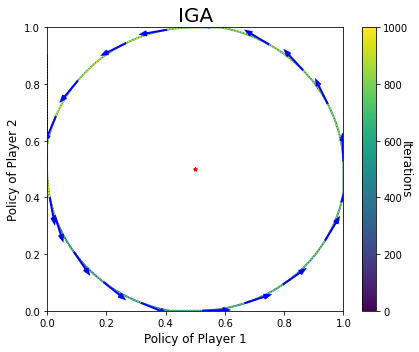

IGA Done


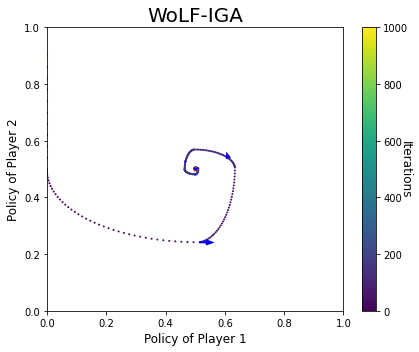

WoLF-IGA Done


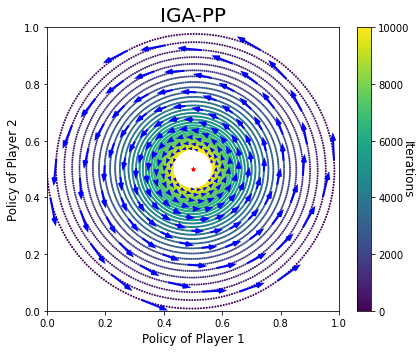

IGA-PP Done


In [6]:
agents = ['IGA', 'WoLF-IGA', 'IGA-PP']

for agent in agents:

  if agent == 'IGA':
      pi_alpha_history, \
      pi_beta_history, \
      pi_alpha_gradient_history, \
      pi_beta_gradient_history = IGA(pi_alpha,
                                     pi_beta,
                                     payoff_0,
                                     payoff_1,
                                     u_alpha,
                                     u_beta,
                                     iteration=1000, # iteration number
                                     eta=0.01 # step size
                                    )
  elif agent == 'WoLF-IGA':
      pi_alpha_history, \
      pi_beta_history, \
      pi_alpha_gradient_history, \
      pi_beta_gradient_history = WoLF_IGA(pi_alpha,
                                          pi_beta,
                                          payoff_0,
                                          payoff_1,
                                          u_alpha,
                                          u_beta,
                                          pi_alpha_nash=pi_alpha_nash,
                                          pi_beta_nash=pi_beta_nash,
                                          iteration=1000, # iteration number
                                          eta_min=0.01, # min step size
                                          eta_max=0.04 # max step size 
                                         )


  elif agent == 'IGA-PP':
      pi_alpha_history, \
      pi_beta_history, \
      pi_alpha_gradient_history, \
      pi_beta_gradient_history = IGA_PP(pi_alpha,
                                        pi_beta,
                                        payoff_0,
                                        payoff_1,
                                        u_alpha,
                                        u_beta,
                                        iteration=10000, # iteration number
                                        eta=0.01, # step size
                                        gamma=0.01 # step size for policy prediction
                                       )


  plot_dynamics(pi_alpha_history,
                pi_beta_history,
                pi_alpha_gradient_history,
                pi_beta_gradient_history,
                agent)
  print('{} Done'.format(agent))

## Part II: Stochastic Game  (10 points)

### Problem Description

In this part, you are required to implement two agent to play the Stochastic Game, which has non-monotonicity reward and requires exploration to achieve the global optimal. 

There are $3$ intermediate states before arriving at the final state. The game transition and reward matrices are:

![Stochastic Game](https://raw.githubusercontent.com/mlii/mvrl/master/data/sg.png)

Given an initial reward matrix (shown in the middle of the above plot), the choice of joint action leads to different branches. For example, the joint action pair (0, 0) will lead to the left branch, while the joint action pair (1, 1) will lead to the branch on the right. Agents can observe the current step number and branch. Zero rewards lead to the termination state (shown as the red cross).

The optimal policy is to take the top left action pair (0, 0), and finally take the bottom right action pair (1, 1), resulting in a optimal total payoff of $8$.

This game is not easy, because it needs $3$-step exploration to discover the optimal policy, and is hard to deviate from sub-optimal (the right branch). Thus, using a strategic exploration approach is necessary.


In [7]:
import numpy as np


class StochasticGame():
    def __init__(self, episode_limit=5, good_branches=2, batch_size=None, **kwargs):
        # Define the agents
        self.n_agents = 2

        self.episode_limit = episode_limit

        # Define the internal state
        self.steps = 0

        r_matrix = [[1,1],[1,1]]
        self.payoff_values = [r_matrix for _ in range(self.episode_limit)]
        self.final_step_diff =[[1,1],[1,4]]

        self.branches = 4
        self.branch = 0

        self.n_actions = len(self.payoff_values[0])

        self.good_branches = good_branches

    def reset(self):
        """ Returns initial observations and states"""
        self.steps = 0
        self.branch = 0
        return self.get_obs()

    def step(self, actions):
        """ Returns reward, terminated, info """
        current_branch = 0
        if (actions[0], actions[1]) == (0,0):
            current_branch = 0
        if (actions[0], actions[1]) == (0,1):
            current_branch = 1
        if (actions[0], actions[1]) == (1,0):
            current_branch = 2
        if (actions[0], actions[1]) == (1,1):
            current_branch = 3

        if self.steps == 0:
            self.branch = current_branch

        info = {}

        info["good_payoff"] = 0
        info["branch"] = self.branch

        if self.good_branches == 4:
            reward = 1 if self.branch == current_branch else 0 # Need to follow your branch
        elif self.good_branches == 2:
            reward = 1 if self.branch in [0,3] and self.branch == current_branch else 0
        else:
            raise Exception("Environment not setup to handle {} good branches".format(self.good_branches))

        if self.episode_limit > 1 and self.steps == self.episode_limit - 1 and self.branch == 0:
            info["good_payoff"] = 1
            reward = self.final_step_diff[actions[0]][actions[1]]

        self.steps += 1

        if self.steps < self.episode_limit and reward > 0:
            terminated = False
        else:
            terminated = True

        info["episode_limit"] = False

        # How often the joint-actions are taken
        info["action_00"] = 0
        info["action_01"] = 0
        info["action_10"] = 0
        info["action_11"] = 0
        if (actions[0], actions[1]) == (0, 0):
            info["action_00"] = 1
        if (actions[0], actions[1]) == (0, 1):
            info["action_01"] = 1
        if (actions[0], actions[1]) == (1, 0):
            info["action_10"] = 1
        if (actions[0], actions[1]) == (1, 1):
            info["action_11"] = 1

        return self.get_obs(), [reward] * 2, [terminated] * 2, info

    def get_obs(self):
        """ Returns all agent observations in a list """
        one_hot_step = [0] * (self.episode_limit + 1 + self.branches)
        one_hot_step[self.steps] = 1
        one_hot_step[self.episode_limit + 1 + self.branch] = 1
        return [tuple(one_hot_step) for _ in range(self.n_agents)]

    def get_obs_agent(self, agent_id):
        """ Returns observation for agent_id """
        return self.get_obs()[agent_id]

    def get_obs_size(self):
        """ Returns the shape of the observation """
        return len(self.get_obs_agent(0))

    def get_state(self):
        return self.get_obs_agent(0)

    def get_state_size(self):
        """ Returns the shape of the state"""
        return self.get_obs_size()

    def get_total_actions(self):
        """ Returns the total number of actions an agent could ever take """
        return self.n_actions


### Example: Random Policy

A simple agent using random policy is provided below.

In [8]:
from collections import defaultdict
from functools import partial
from abc import ABCMeta, abstractmethod
import random

import numpy as np

def sample(pi):
  return np.random.choice(pi.size, size=1, p=pi)[0]

def normalize(pi):
    minprob = np.min(pi)
    if minprob < 0.0:
        pi -= minprob
    pi /= np.sum(pi)

class BaseQAgent:
    def __init__(self, name, action_num=2, phi=0.01, gamma=0.95, episilon=0.1, **kwargs):
        self.name = name
        self.action_num = action_num
        self.episilon = episilon
        self.gamma = gamma
        self.phi = phi
        self.epoch = 0
        self.Q = None
        self.pi = defaultdict(partial(np.random.dirichlet, [1.0] * self.action_num))

    def done(self):
        pass

    def act(self, observation, exploration=False):
        if exploration and random.random() < self.episilon:
            return random.randint(0, self.action_num - 1)
        else:
            return sample(self.pi[observation])

    @abstractmethod
    def update(self, observation, action, reward, next_observation, done):
        pass

    @abstractmethod
    def update_policy(self, observation, action):
        pass



### TODO: Implement an agent using Q-Learning (3 points)

Q-Learning is a single agent learning algorithm for finding optimal policies in MDPs. The key updating rule is as follwings:

$$
Q(s, a) \leftarrow(1-\phi) Q(s, a)+\phi\left(r+\gamma V\left(s^{\prime}\right)\right)
$$

where,
$$
V(s)=\max\left(\left[Q(s, a)_{a \in \mathcal{A}}\right]\right)
$$

In [9]:
class QAgent(BaseQAgent):
    def __init__(self, **kwargs):
        super().__init__('QAgent', **kwargs)
        self.Q = defaultdict(partial(np.random.rand, self.action_num))
        self.R = defaultdict(partial(np.zeros, self.action_num))
        self.count_R = defaultdict(partial(np.zeros, self.action_num))

    def done(self):
        self.R.clear()
        self.count_R.clear()

    def update(self, observation, action, reward, next_observation, done):
        self.count_R[observation][action] += 1.0
        self.R[observation][action] += (reward - self.R[observation][action]) / self.count_R[observation][action]
        Q = self.Q[observation]
        V = self.val(next_observation)
        
        if done:
            ########### TODO:Implement Q-Learning (Q updating for termination) (1 point) ###########
            Q[action] = (1 - self.phi)*Q[action] + self.phi*(reward + self.gamma*V)
            self.done()
            ########### END TODO #####################################################
        else:
            ########### TODO:Implement Q-Learning (Q updating) (1 point) ###########
            Q[action] = (1 - self.phi)*Q[action] + self.phi*(reward + self.gamma*V)
            ########### END TODO #####################################################
        self.update_policy(observation, action)
        self.epoch += 1

    def val(self, observation):
        ########### TODO:Implement Q-Learning (V) (1 point) ###########
        v = np.max(self.Q[observation])
        ########### END TODO ##########################################
        return v

    def update_policy(self, observation, action):
        Q = self.Q[observation]
        self.pi[observation] = (Q == np.max(Q)).astype(np.double)
        self.pi[observation] = self.pi[observation] / np.sum(self.pi[observation])
  

### Test your Q agents on the Stochastic Game

In [10]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from copy import deepcopy

def rollout(env, agents, exploration=True, max_iter=5000, log_episode_interval=100, verbose=False):
  history_reward = []
  state_n = env.reset()
  episode_reward = 0
  episode_count = 0
  recorded_episodes = []
  recorded_episode_reward = []
  for i in range(max_iter):
      actions = np.array([agent.act(state, exploration) for state, agent in zip(state_n, agents)])
      next_state_n, reward_n, done_n, _ = env.step(actions)
      episode_reward += np.mean(reward_n)
      for j, (state, reward, next_state, done, agent) in enumerate(zip(state_n, reward_n, next_state_n, done_n, agents)):
          agent.update(state, actions[j], reward, next_state, done)
      state_n = next_state_n
      if np.all(done_n):
          state_n = env.reset()
          history_reward.append(episode_reward)
          episode_reward = 0
          episode_count += 1
          if (i + 1) %  log_episode_interval == 0:
            recorded_episodes.append(i)
            episodes_mean_reward = np.mean(history_reward)
            recorded_episode_reward.append(episodes_mean_reward)
            history_reward = []
            if verbose:
                print('Iterations {}, Reward {}'.format(i, episodes_mean_reward))
  return recorded_episodes, recorded_episode_reward

In [11]:
agent_num = 2
action_num = 2

runs = 10
# store data for each run
train_recorded_episodes_log = []
train_recorded_episode_reward_log = []
test_recorded_episode_reward_log = []

for i in range(runs):
  ##################################### INITIALISATION ####################################
  agents = []
  env = StochasticGame()
  for i in range(agent_num):
      agent = QAgent(action_num=action_num)
      agents.append(agent)

  ####################################### TRAINING #######################################
  train_recorded_episodes, train_recorded_episode_reward = rollout(env=env, 
                                                                  agents=agents, 
                                                                  exploration=True, 
                                                                  max_iter=50000)
  # store result for every run
  train_recorded_episodes_log.append(train_recorded_episodes)
  train_recorded_episode_reward_log.append(train_recorded_episode_reward)

  ####################################### TESTING #######################################
  test_recorded_episodes, test_recorded_episode_reward = rollout(env=env, 
                                                               agents=agents, 
                                                               exploration=False, 
                                                               max_iter=10, 
                                                               log_episode_interval=1)
  # store result for every run
  test_recorded_episode_reward_log.append(np.mean(test_recorded_episode_reward))

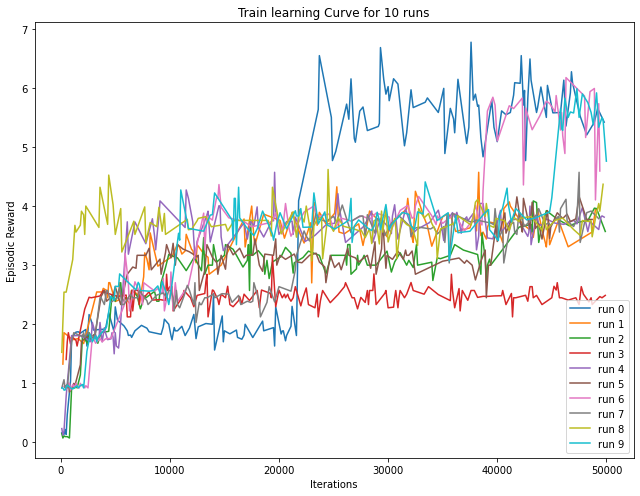

Test reward is (average over 10 runs): 5.7


In [12]:
####################################### TRAINING #######################################
# different episodes returned every time so each learning curve shown separately
fig = plt.figure(figsize=(9, 7))
ax = fig.add_subplot(111)

for i in range(runs):
  ax.plot(train_recorded_episodes_log[i], train_recorded_episode_reward_log[i], label=f'run {i}')
ax.set_title(f"Train learning Curve for {runs} runs")
ax.set_ylabel("Episodic Reward")
ax.set_xlabel("Iterations")
ax.legend(loc="lower right")
plt.tight_layout()
plt.show()

####################################### TESTING #######################################
print(f'Test reward is (average over {runs} runs):', np.mean(test_recorded_episode_reward_log))

In [13]:
print(test_recorded_episode_reward_log)

[8.0, 5.0, 5.0, 3.0, 5.0, 5.0, 8.0, 5.0, 5.0, 8.0]


### TODO: Implement an Advanced Agent to solve the Stochastic Game (7 points)

Unless you are extremely lucky, the Q-learning agent implemented above is very hard to succeed in the Stochastic Game. In this part, you are required to implement a really cool agent to play the Stochastic Game. 

**Hint: You might want to use a strategic exploration approach.**

Points will be given based on the performance of your algorithm, e.g., if the test reward of your algorithm is 6, you will be given 6/8*9=6.75 points, since the optimal payoff is 8.

In [14]:
# You can write any code to implement your CoolAgent, please ouput
# action via the act(observation, exploration) method
class CoolAgent(BaseQAgent):
    def __init__(self, **kwargs):
        super().__init__('CoolAgent', **kwargs)
        self.Q              = defaultdict(partial(np.random.rand, self.action_num))     # Q value
        self.R              = defaultdict(partial(np.zeros, self.action_num))           # reward
        self.count_R        = defaultdict(partial(np.zeros, self.action_num))           # reward count
        self.count_action   = defaultdict(partial(np.zeros, self.action_num))           # N_t(a)
        self.explore_weight = 13.5

    def done(self):
        self.R.clear()
        self.count_R.clear()

    def act(self, observation, exploration):
        if exploration:
            Q               = self.Q[observation] # n x 1 array
            Explore_term    = self.explore_weight*np.sqrt(np.log(self.epoch)/self.count_action[observation])
            return np.argmax(Q + Explore_term)
        else:
            return sample(self.pi[observation])
        
    @abstractmethod
    def update(self, observation, action, reward, next_observation, done):
        self.count_R[observation][action]   += 1.0
        self.R[observation][action]         += (reward - self.R[observation][action]) / self.count_R[observation][action]
        Q                                    = self.Q[observation]
        V                                    = self.val(next_observation)
        
        if done:
            Q[action] = (1 - self.phi)*Q[action] + self.phi*(reward + self.gamma*V)
            self.done()
        else:
            Q[action] = (1 - self.phi)*Q[action] + self.phi*(reward + self.gamma*V)
        self.update_policy(observation, action) # Greedy policy
        self.count_action[observation][action] += 1
        self.epoch += 1
    
    @abstractmethod
    def val(self, observation):
        v = np.max(self.Q[observation])
        return v

    @abstractmethod
    def update_policy(self, observation, action):
        # Greedy policy
        Q = self.Q[observation]
        self.pi[observation] = (Q == np.max(Q)).astype(np.double)
        self.pi[observation] = self.pi[observation] / np.sum(self.pi[observation])

In [15]:
# Feel Free to write code here to train and tune your cool agents, 
# and assign the trained agents to cool_agents at the end
# ########################################
# TODO: Your cool agent training code #############
agent_num = 2
action_num = 2

runs = 10
# store data for each run
train_cool_recorded_episodes_log = []
train_cool_recorded_episode_reward_log = []
test_cool_recorded_episode_reward_log = []

for i in range(runs):
  ##################################### INITIALISATION ####################################
  agents = []
  env = StochasticGame()
  for i in range(agent_num):
      agent = CoolAgent(action_num=action_num)
      agents.append(agent)

  ####################################### TRAINING #######################################
  train_cool_recorded_episodes, train_cool_recorded_episode_reward = rollout(env=env, 
                                                                  agents=agents, 
                                                                  exploration=True, 
                                                                  max_iter=70000)
  # store result for every run
  train_cool_recorded_episodes_log.append(train_cool_recorded_episodes)
  train_cool_recorded_episode_reward_log.append(train_cool_recorded_episode_reward)
  
  ####################################### TESTING #######################################
  #########################################
  cool_agents = agents
  # Cool agent evaluation code, please do not change
  cool_env = StochasticGame()
  test_cool_recorded_episodes, test_cool_recorded_episode_reward = rollout(env=cool_env, 
                                                                        agents=cool_agents, 
                                                                        exploration=False, 
                                                                        max_iter=10, 
                                                                        log_episode_interval=1)
  # store result for every run
  test_cool_recorded_episode_reward_log.append(np.mean(test_cool_recorded_episode_reward))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in sqrt
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in true_divide


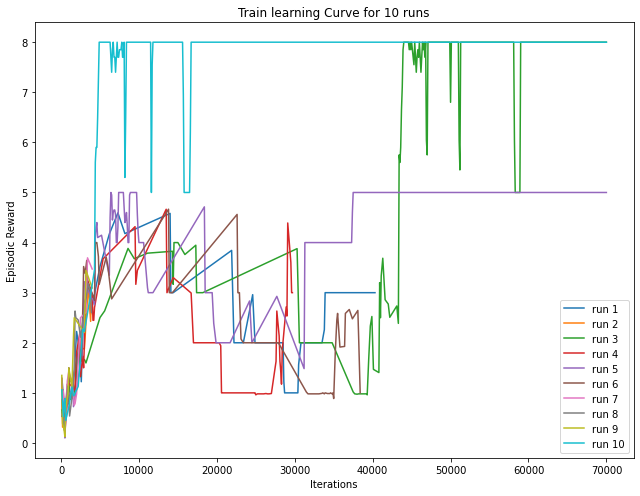

Cool agent's test reward is (average over 10 runs): 7.4


In [16]:
####################################### TRAINING #######################################
fig = plt.figure(figsize=(9, 7))
ax = fig.add_subplot(111)

for i in range(runs):
  ax.plot(train_cool_recorded_episodes_log[i], train_cool_recorded_episode_reward_log[i], label=f'run {i+1}')
ax.set_title(f"Train learning Curve for {runs} runs")
ax.set_ylabel("Episodic Reward")
ax.set_xlabel("Iterations")
ax.legend(loc="lower right")
plt.tight_layout()
plt.show()

####################################### TESTING #######################################
print(f'Cool agent\'s test reward is (average over {runs} runs):', np.mean(test_cool_recorded_episode_reward_log))

In [17]:
print(test_cool_recorded_episode_reward_log)

[5.0, 8.0, 8.0, 8.0, 5.0, 8.0, 8.0, 8.0, 8.0, 8.0]


Few words to analysis the results comparing to the Q Agent, and what you have did to improve the performance. (< 300 words)

Upper confidence bound is used to enhance the performance in CoolAgent(). In this strategy instead of just calculating the Q value and use the $\epsilon$ greedy approach, we also calculate the following to determine the action $A$:

$A = argmax_a \left[Q(a) + c\sqrt{\frac{ln(t)}{N(a)}}\right]$

The strategy part is in the term $\sqrt{\frac{ln(t)}{N_t (a)}}$. We can see that as the number of epoch $t$ increase, if the number of times action $a$ is taken $N(a)$ is small, the whole term will be very large, so the value of that action will be dominant by this square root term and result in choosing the $a$ as the final action $A$. On the other hand, if $N(a)$ is large, then $Q(a)$ will take over the dominant as the square root term now becomes insignificant. Moreover, in QAgent() just return a random number when exploring, but in CoolAgent() we take the Q value and the square root term to have a more strategical approach to explore the problem.

For the weighting $c$, I have run this section with different values using a broad to narrow approach and finally determined the value of $c = 13.5$, which gives a mean reward of $7.4\pm1.2$. The modified code is appended at the end of this document as Appendix 1. Below shows the result of the script executed in VSCode, the plots of the training rewards for QAgent() and CoolAgent(), and their mean test rewards.

Board to narrow test for upper confidence bound algorithm:
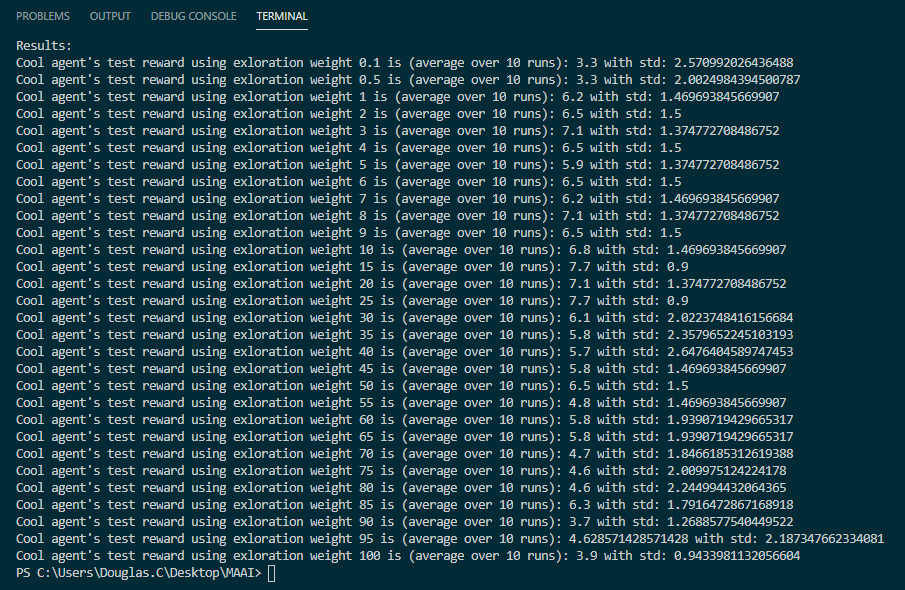

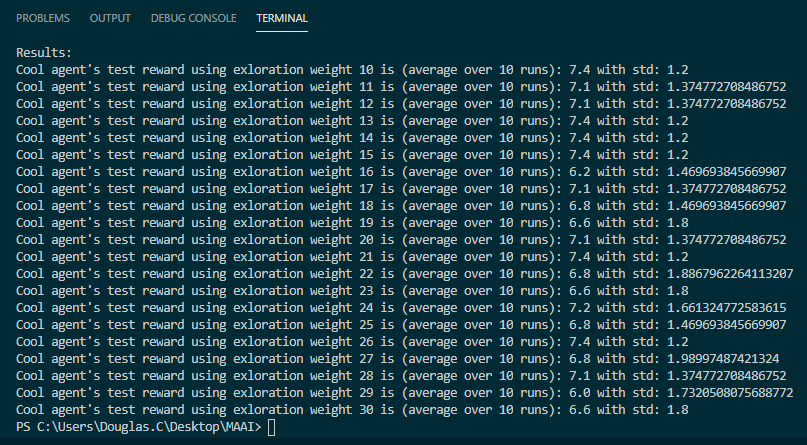

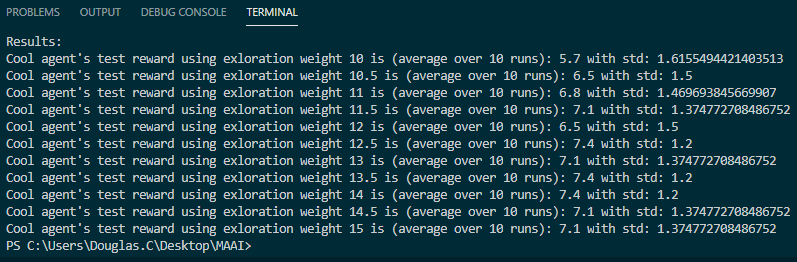

Result from class QAgent:

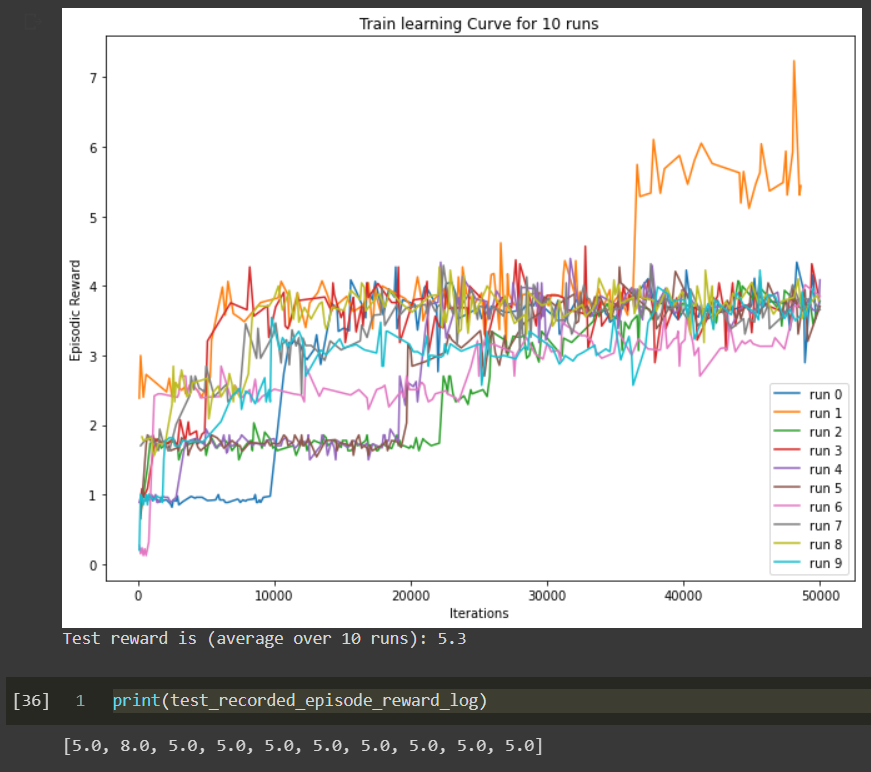

Result from class CoolAgent:

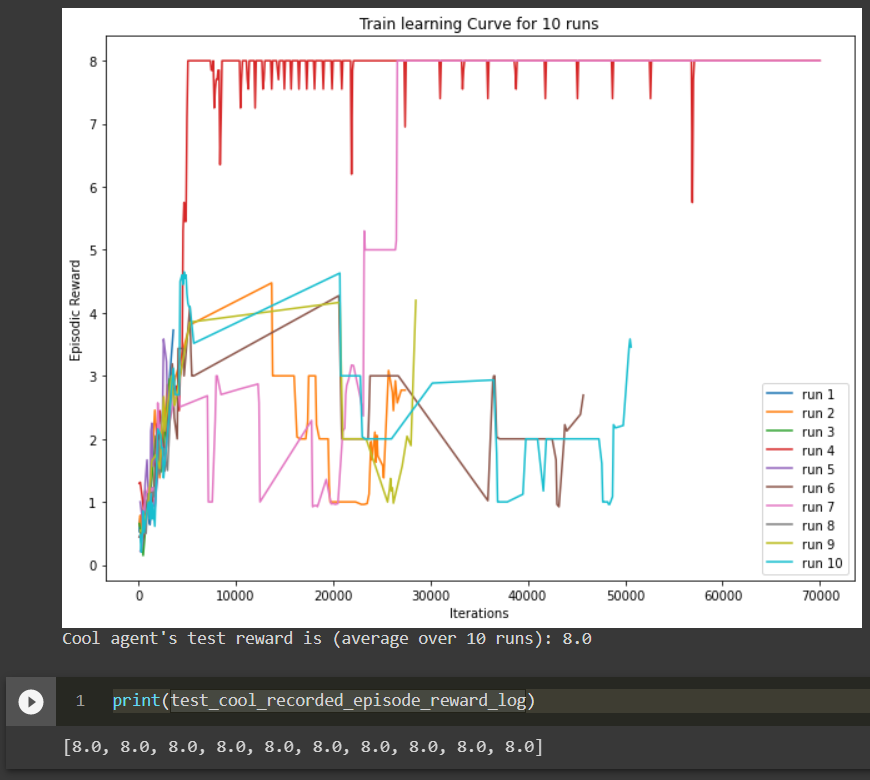




## Part III: Cournot Duopoly (12 points)

Cournot Duopoly is a classic static game that models the imperfect competition in which multiple firms compete in price and production to capture market share.
Since the firms' actions are continuous variables, the game is a continuous action setting.
It is a **nonzero-sum game** (neither team-based nor zero-sum) which represents a challenge for current MARL methods.

Let $a_i\in [-A_i,A_i]$ represents the set of actions for agent $i\in\{1,2\ldots, N\}:=\mathcal{N}$,
where $A_i\in \mathbb{R}_{>0}$.
Each agent $i$'s reward (profit) is 
$$
R_i(a_i,a_{-i})=g_i(a_i,a_{-i})+ w_i(a_i),
$$
where
$
\partial^{2} g_{i} / \partial a_{i}^{2}<0, \partial g_{i} / \partial a_{-i}<0
$,and 
$\partial^{2} g_{i} / \partial a_{i} \partial a_{-i}<0
$.
Agents adopt Markov policies as
$
a_{i} = \pi_i(a_{-i}).
$


#### TODO: Assume $N=2$, prove that policy $\pi_i$ is non-increasing. (5 points)



For Cournot duopoly we can express the reward function $R$ as:

For agent 1:
$R_1(a_1,a_2) = g_1(a_1,a_2)+ w_1(a_1)$

For agent 2:
$R_2(a_1,a_2) = g_2(a_1,a_2)+ w_2(a_2)$

given $N = 2$, where $g_i$ is the action*price function and $w_i$ is the cost function.

Since we are considering the case $N=2$, it is reasonable to assume the function $g_i = a_iP(a_i, a_{-i}) = a_i(k - a_i - a_{-i})$ and the cost function $w_i = -C_i(a_i)$ where $C_i(a_i)$ is an increasing function as when we increase the product quantity $a_i$ the cost for producing that much quantity will definitely increase. To confirm that $g_i$ satisfy the condition given:

$g_i = a_i(k - a_i - a_{-i}) = ka_i - a_i^2 - a_ia_{-i}$

$\frac{\partial^2 g_i}{\partial a_i^2} = -2 < 0$

$\frac{\partial^2 g_i}{\partial a_i \partial a_{-i}} = -1 < 0$

$\frac{\partial g_i}{\partial a_{-i}} = -a_i < 0$

which satisfy the condition given. 

Now by considering the Nash Equilibrium of this case, we have:

$R_i = ka_i - a_i^2 - a_ia_{-i} - C_i(a_i)$

$\frac{\partial R_i}{\partial a_i} = k - 2a_i - a_{-i} - \frac{\partial C_i(a_i)}{\partial a_i}$

$k - 2a_i - a_{-i} - \frac{\partial C_i(a_i)}{\partial a_i} = 0$

$a_i = \frac{1}{2}\left[k - a_{-i} - \frac{\partial C_i(a_i)}{\partial a_i}\right]$

Then by symmetry:

$a_{-i} = \frac{1}{2}\left[k - a_{i} - \frac{\partial C_{-i}(a_{-i})}{\partial a_{-i}}\right]$

Combining $a_i, a_{-i}$ gives:

$a_i = \frac{1}{2}\left[k - \frac{1}{2}\left[k - a_{i} - \frac{\partial C_{-i}(a_{-i})}{\partial a_{-i}}\right] - \frac{\partial C_i(a_i)}{\partial a_i}\right]$

$a_i = \frac{1}{3}\left[k + \frac{\partial C_{-i}(a_{-i})}{\partial a_{-i}} - 2\frac{\partial C_i(a_i)}{\partial a_i} \right]$

Since the coefficient with $\frac{\partial C_i(a_i)}{\partial a_i}$ is $-2$ and the coefficient with $\frac{\partial C_{-i}(a_{-i})}{\partial a_{-i}}$ is $+1$ the term $\left[k + \frac{\partial C_{-i}(a_{-i})}{\partial a_{-i}} - 2\frac{\partial C_i(a_i)}{\partial a_i} \right]$ is definitely non increasing. Therefore $a_i = \pi_i$ is non increasing.

#### TODO: Set up Cournot Duopoly game. (2 points)



Suppose that 
$$
g_i=a_i(\alpha -\beta\sum_{j\in\mathcal{N}}a_j),
w_i=\gamma a_i.
$$
We choose $A_i=1.0, \forall i\in\mathcal{N}$ and $\alpha=1.5, \beta=1.0, \gamma=-0.5$.

In [18]:
import numpy as np
import gym

class CournotDuopoly(gym.Env):
    def __init__(self, agent_num=2, action_range=(-1., 1.)):
        self.agent_num = agent_num
        self.action_space = gym.spaces.Box(low=-1.0, high=1.0, shape=(1,))
        self.rewards = np.zeros((self.agent_num,))
        self.t = 0

        alpha = 1.5
        beta = 1.0
        gamma = -0.5

        def payoff_n_cournot(action_n, i):
            """
            Define the payoff function R_i(a_i,a_{-i}).
            :param action_n: (nd.array) a list of all agents' actions, shape is (agent_num,)
            :param i: agent index
            :return: R_i(a_i,a_{-i})
            """
            ########### TODO: Compute R_i(a_i,a_{-i}) (1 point) ###########
            r = action_n[i]*(alpha - beta*np.sum(action_n)) + gamma*action_n[i]
            ########### END TODO ############################
            return r

        def payoff_n_cournot_derivative(action_n, i):
            """
            Define the partial derivative of the payoff function R_i(a_i,a_{-i}) w.r.t. a_i.
            :param action_n: (nd.array) a list of all agents' actions, shape is (agent_num,)
            :param i: agent index
            :return: \partial R_i(a_i,a_{-i}) / \partial a_i
            """
            ########### TODO: Compute \partial R_i(a_i,a_{-i}) / \partial a_i (1 point) ###########
            dr = alpha + gamma - beta*np.sum(action_n)
            ########### END TODO ############################
            return dr
        
        self.payoff = payoff_n_cournot
        self.payoff_n_derivative = payoff_n_cournot_derivative

    def step(self, action_n):
        """
        Define the environment step function.
        :param action_n: (nd.array) a list of all agents' actions, shape is (agent_num,)
        :return: state_n: (nd.array) a list of all agents' actions, shape is (agent_num,)
        :return: reward_n: (nd.array) a list of all agents' states, shape is (agent_num,)
        :return: done_n: (nd.array) a list of all agents' done status, shape is (agent_num,)
        :return: info: (dict) a dictionary of customized information
        """
        actions = np.array(action_n).reshape((self.agent_num,))
        reward_n = np.zeros((self.agent_num,))
        payoff_derivative_n = np.zeros((self.agent_num,))
        for i in range(self.agent_num):
            payoff_derivative_n[i] = self.payoff_n_derivative(actions, i)
            reward_n[i] = self.payoff(actions, i)
        self.rewards = reward_n
        state_n = np.array(list([[0.0 * i] for i in range(self.agent_num)]))
        info = {'reward_n': reward_n, 'reward_n_derivative': payoff_derivative_n} 
        done_n = np.array([True] * self.agent_num)
        self.t += 1
        # print("state_n, reward_n, done_n, info", state_n, reward_n, done_n, info)
        return state_n, reward_n, done_n, info

    def reset(self):
        return np.array(list([[0.0 * i] for i in range(self.agent_num)]))

    def get_rewards(self):
        return self.rewards
    
    def render(self, mode="human", close=False):
        pass

    def terminate(self):
        pass


#### TODO: Implement MADDPG agents to play the Cournot Duopoly Game. (3 points)


Implement the MADDPG algorithm presented in the paper:
[Multi-Agent Actor-Critic for Mixed Cooperative-Competitive Environments](https://arxiv.org/pdf/1706.02275.pdf).

In [19]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import os

class Actor(nn.Module):
    def __init__(self):
        super(Actor, self).__init__()
        self.fc1 = nn.Linear(1, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.action_out = nn.Linear(64, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        actions = torch.tanh(self.action_out(x))
        return actions


class Critic(nn.Module):
    def __init__(self, obs_shape, action_shape):
        super(Critic, self).__init__()
        self.fc1 = nn.Linear(obs_shape + action_shape, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.q_out = nn.Linear(64, 1)

    def forward(self, state, action):
        state = torch.cat(state, dim=1)
        action = torch.cat(action, dim=1)
        x = torch.cat([state, action], dim=1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        q_value = self.q_out(x)
        return q_value


class MADDPG:
    def __init__(self, n_agents, agent_id, obs_shape=1, action_shape=1):
        self.n_agents = n_agents
        self.agent_id = agent_id
        self.action_shape = action_shape
        self.train_step = 0
        self.lr_actor = 1e-4
        self.lr_critic = 1e-3
        self.tau = 0.01
        self.gamma = 0.95

        # create the network
        self.actor_network = Actor()
        self.critic_network = Critic(obs_shape * self.n_agents,
                                     action_shape * self.n_agents)

        # build up the target network
        self.actor_target_network = Actor()
        self.critic_target_network = Critic(obs_shape * self.n_agents,
                                            action_shape * self.n_agents)

        # load the weights into the target networks
        self.actor_target_network.load_state_dict(self.actor_network.state_dict())
        self.critic_target_network.load_state_dict(self.critic_network.state_dict())

        # create the optimizer
        self.actor_optim = torch.optim.Adam(self.actor_network.parameters(), lr=self.lr_actor)
        self.critic_optim = torch.optim.Adam(self.critic_network.parameters(), lr=self.lr_critic)

    # soft update
    def _soft_update_target_network(self):
        for target_param, param in zip(self.actor_target_network.parameters(),
                                       self.actor_network.parameters()):
            ########### TODO: Soft-update target actor network (0.5 point) ###########
            target_param.data.copy_(self.tau*param.data + (1 - self.tau)*target_param.data)
            ########### END TODO ############################

        for target_param, param in zip(self.critic_target_network.parameters(),
                                       self.critic_network.parameters()):
            ########### TODO: Soft-update target critic network (0.5 point) ###########
            target_param.data.copy_(self.tau*param.data + (1 - self.tau)*target_param.data)
            ########### END TODO ############################

    # update the network
    def train(self, transitions, other_agents):
        for key in transitions.keys():
            transitions[key] = torch.tensor(transitions[key], dtype=torch.float32)
        r = transitions['r_%d' % self.agent_id]
        o, u, o_next = [], [], []
        for agent_id in range(self.n_agents):
            o.append(transitions['o_%d' % agent_id])
            u.append(transitions['u_%d' % agent_id])
            o_next.append(transitions['o_next_%d' % agent_id])

        # calculate the target Q value function
        u_next = []
        with torch.no_grad():
            index = 0
            for agent_id in range(self.n_agents):
                if agent_id == self.agent_id:
                    u_next.append(self.actor_target_network(o_next[agent_id]))
                else:
                    u_next.append(other_agents[index].actor_target_network(o_next[agent_id]))
                    index += 1
            q_next = self.critic_target_network(o_next, u_next).detach()

            ########### TODO: Calculate the target Q value function (0.5 point) ###########
            target_q = r.reshape(r.size()[0], 1) + self.gamma*self.critic_network.forward(o_next, u_next)
            ########### END TODO ############################

        # the q loss
        q_value = self.critic_network(o, u)
        ########### TODO: Calculate the critic loss (0.5 point) ###########
        critic_loss = ((target_q - q_value)**2).mean()
        ########### END TODO ############################

        # the actor loss
        u[self.agent_id] = self.actor_network(o[self.agent_id])
        ########### TODO: Calculate the actor loss (0.5 point) ###########
        actor_loss = -self.critic_network.forward(o, u).mean()
        ########### END TODO ############################
        # update the network
        self.actor_optim.zero_grad()
        actor_loss.backward()
        self.actor_optim.step()
        self.critic_optim.zero_grad()
        critic_loss.backward()
        self.critic_optim.step()

        self._soft_update_target_network()
        self.train_step += 1

    def select_action(self, o, noise_rate, epsilon):
        if np.random.uniform() < epsilon:
            u = np.random.uniform(-1.0, 1.0, self.action_shape)
        else:
            inputs = torch.tensor(o, dtype=torch.float32).unsqueeze(0)
            ########### TODO: Take action based on the actor network (0.5 point) ###########
            u = self.actor_network.forward(inputs)[0].detach().numpy() + noise_rate
            ########### END TODO ############################
        return u.copy()

    def learn(self, transitions, other_agents):
        self.train(transitions, other_agents)


#### Some useful scripts (please execute).


In [20]:
import threading

class Buffer:
    def __init__(self, n_agents=5):
        self.n_agents = n_agents
        self.size = int(5e5)
        # memory management
        self.current_size = 0
        # create the buffer to store info
        self.buffer = dict()
        for i in range(self.n_agents):
            self.buffer['o_%d' % i] = np.empty([self.size, 1])
            self.buffer['u_%d' % i] = np.empty([self.size, 1])
            self.buffer['r_%d' % i] = np.empty([self.size])
            self.buffer['o_next_%d' % i] = np.empty([self.size, 1])
        # thread lock
        self.lock = threading.Lock()

    # store the episode
    def store_episode(self, o, u, r, o_next):
        idxs = self._get_storage_idx(inc=1)
        for i in range(self.n_agents):
            with self.lock:
                self.buffer['o_%d' % i][idxs] = o[i]
                self.buffer['u_%d' % i][idxs] = u[i]
                self.buffer['r_%d' % i][idxs] = r[i]
                self.buffer['o_next_%d' % i][idxs] = o_next[i]
    
    # sample the data from the replay buffer
    def sample(self, batch_size):
        temp_buffer = {}
        idx = np.random.randint(0, self.current_size, batch_size)
        for key in self.buffer.keys():
            temp_buffer[key] = self.buffer[key][idx]
        return temp_buffer

    def _get_storage_idx(self, inc=None):
        inc = inc or 1
        if self.current_size+inc <= self.size:
            idx = np.arange(self.current_size, self.current_size+inc)
        elif self.current_size < self.size:
            overflow = inc - (self.size - self.current_size)
            idx_a = np.arange(self.current_size, self.size)
            idx_b = np.random.randint(0, self.current_size, overflow)
            idx = np.concatenate([idx_a, idx_b])
        else:
            idx = np.random.randint(0, self.size, inc)
        self.current_size = min(self.size, self.current_size+inc)
        if inc == 1:
            idx = idx[0]
        return idx

def evaluate(env, agents, agent_num, evaluate_episodes, evaluate_episode_len):
    returns = []
    for episode in range(evaluate_episodes):
        # reset the environment
        s = env.reset()
        rewards_n = np.zeros(agent_num)
        rs = []
        alist = []
        rewards1 = 0
        for time_step in range(evaluate_episode_len):
            actions = []
            with torch.no_grad():
                for agent_id, agent in enumerate(agents):
                    action = agent.select_action(s[agent_id], 0, 0)
                    actions.append(action)
            s_next, r, done, info = env.step(actions)
            if type(info['reward_n']) is list:
                rewards_n += np.sum(info['reward_n'])
            else:
                rewards_n += info['reward_n'].squeeze()

            s = s_next
        returns.append(rewards_n)
    s = env.reset()
    mean_return = sum(returns) / evaluate_episodes

    return mean_return


#### Test your implemented MADDPG agent in the Cournot Duopoly Game.


  1%|          | 120/20000 [00:08<32:56:27,  5.97s/it]

[ 4.37549451 10.93214579  2.88496319  5.37808337 -8.15537667]


  5%|▌         | 1006/20000 [00:39<2:29:23,  2.12it/s]

[3.90191833 6.24395583 3.46847518 5.03376675 4.14742835]


 10%|█         | 2008/20000 [01:16<2:19:57,  2.14it/s]

[3.86306746 6.52176138 4.04309402 4.35859079 4.51720201]


 15%|█▌        | 3005/20000 [01:54<2:08:52,  2.20it/s]

[3.64235007 5.46075632 4.31081389 5.71922967 5.01120904]


 20%|██        | 4007/20000 [02:32<2:04:23,  2.14it/s]

[3.63228441 5.74677394 4.69216023 5.26831312 5.16489834]


 25%|██▌       | 5005/20000 [03:09<1:53:11,  2.21it/s]

[4.27341775 5.95629097 3.81223206 4.99116521 5.77659994]


 30%|███       | 6008/20000 [03:47<1:47:51,  2.16it/s]

[4.88051918 6.07876163 3.79553138 4.01473881 6.02515919]


 35%|███▌      | 7008/20000 [04:25<1:44:14,  2.08it/s]

[4.63464241 5.95721525 3.34790565 4.54215872 6.24669911]


 40%|████      | 8005/20000 [05:04<1:39:44,  2.00it/s]

[4.78664241 5.88493175 4.19451932 3.72687757 6.19964437]


 45%|████▌     | 9005/20000 [05:42<1:51:33,  1.64it/s]

[4.84906976 5.35594722 4.0333258  4.34490722 5.80516816]


 50%|█████     | 10005/20000 [06:20<1:16:53,  2.17it/s]

[4.47381904 5.21976288 4.54955654 4.1203566  5.87090662]


 55%|█████▌    | 11007/20000 [06:58<1:08:34,  2.19it/s]

[4.70103576 5.19134839 3.89239125 4.78311664 5.80759044]


 60%|██████    | 12005/20000 [07:36<1:00:21,  2.21it/s]

[5.26064251 5.1921062  3.60716982 4.70314455 5.66519626]


 65%|██████▌   | 13006/20000 [08:15<55:21,  2.11it/s]  

[5.31294138 5.36320281 3.4660863  4.81654646 5.62126854]


 70%|███████   | 14008/20000 [08:53<46:00,  2.17it/s]  

[5.14160241 5.28141024 3.58088885 4.52068498 5.5156436 ]


 75%|███████▌  | 15004/20000 [09:31<52:11,  1.60it/s]  

[4.87839198 5.60123727 3.85229729 4.64840703 5.07523077]


 80%|████████  | 16006/20000 [10:10<40:22,  1.65it/s]

[4.56543616 5.70339862 3.62868866 5.05085267 4.85080183]


 85%|████████▌ | 17007/20000 [10:49<22:40,  2.20it/s]

[5.206856   5.66332729 3.49703282 4.34404088 5.20766801]


 90%|█████████ | 18006/20000 [11:27<15:04,  2.21it/s]

[4.51194028 5.70747938 3.78526953 4.71093852 5.5995286 ]


 95%|█████████▌| 19007/20000 [12:06<07:55,  2.09it/s]

[4.43315047 5.87501167 3.56243491 4.57565486 6.22409906]


100%|██████████| 20000/20000 [12:36<00:00, 26.44it/s]


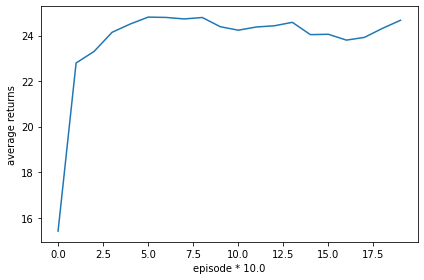

In [21]:
from tqdm import tqdm
import matplotlib.pyplot as plt

noise = 0.1
epsilon = 0.1
episode_limit = 100
n_agents = 5
batch_size = 256
evaluate_rate = 1000
time_steps = 20000
evaluate_episode_len = 100
evaluate_episodes = 100
env = CournotDuopoly(agent_num=n_agents)
agents = [MADDPG(n_agents, i, obs_shape=1, action_shape=1) for 
          i in range(n_agents)]
buffer = Buffer(n_agents=n_agents)

returns = []
done = None
mean_return_eval = 0.
for time_step in tqdm(range(time_steps)):
    if time_step % episode_limit == 0 or np.all(done):
        s = env.reset()
    u = []
    actions = []
    with torch.no_grad():
        for agent_id, agent in enumerate(agents):
            action = agent.select_action(s[agent_id], noise, epsilon)
            u.append(action)
            actions.append(action)

    s_next, r, done, info = env.step(actions)
    buffer.store_episode(s[:n_agents], u,
                         r[:n_agents], s_next[:n_agents])

    s = s_next

    if buffer.current_size >= batch_size:
        transitions = buffer.sample(batch_size)
        for agent in agents:
            other_agents = agents.copy()
            other_agents.remove(agent)
            agent.learn(transitions, other_agents)

    if time_step == 0 or time_step % evaluate_rate == 0:
        mean_return_eval = evaluate(env, agents, n_agents,
                                    evaluate_episodes, evaluate_episode_len)
        returns.append(mean_return_eval)
        print(mean_return_eval)
plt.figure()
plt.plot(range(len(returns)), np.array(returns).sum(-1))
plt.xlabel('episode * ' + str(evaluate_rate / episode_limit))
plt.ylabel('average returns')
plt.tight_layout()
plt.show()

#### TODO: Analyze the performance of your implemented MADDPG algorithm. Describe the reason if it's not playing well.(2 points)

*Hint: Cournot Monopoly is a nonzero-sum game.*

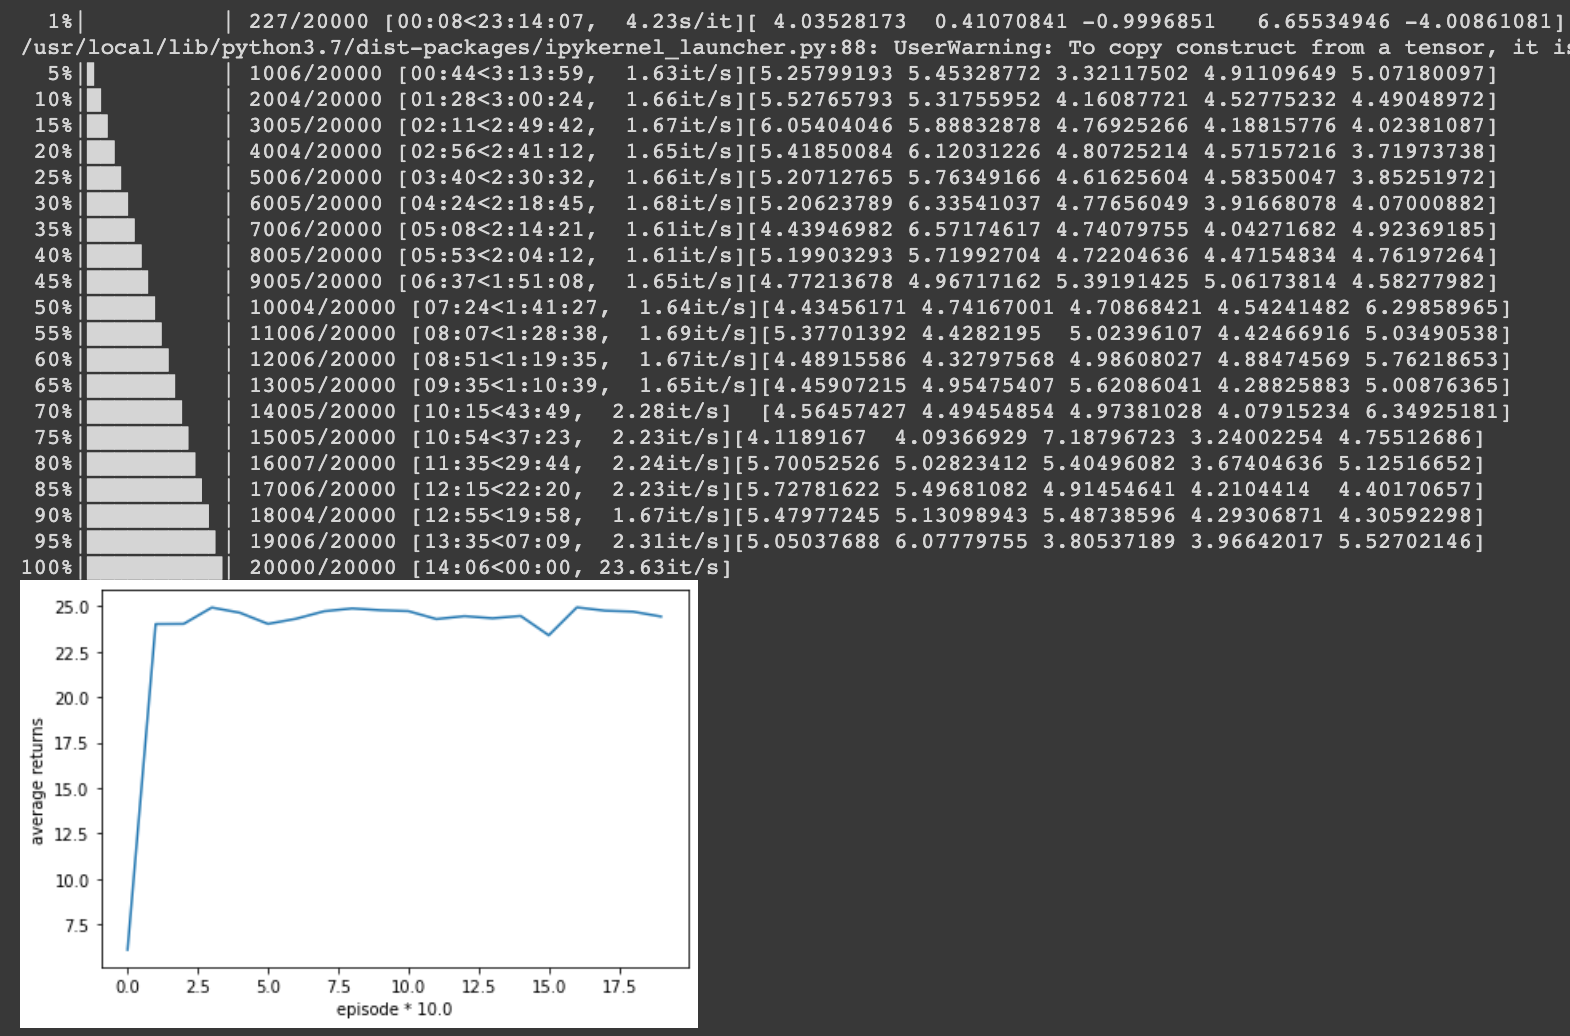

From the graph, we can see the the average overall reward stabilized starting at around 24 at around 125th episode. Albeit the learning curve looks good, it does not means that it always gives an optimal result. For example, at 19006th episode, although the sum of the reward is 24.42698795, the third agent resulted with a minimum reward of 3.80537189, and the second agent resulted with a maximum reward of 6.07779755. This is because non-zero sum game has no optimal strategy which is preferable to all other players.


## Part IV: Deep Multi-Agent Reinforcement Learning (18 points)

For this part of the coursework, you will implement your choice of any deep reinforcement learning algorithms (e.g., DQN, DRQN, or PPO) in a multi-agent setting and get to see it work on the `Switch-n` environment from ma-gym. Please read [the wiki of ma-gym](https://github.com/koulanurag/ma-gym/wiki/) first.

### Environment Example
#### Switch2-v0
![Switch-2](https://raw.githubusercontent.com/koulanurag/ma-gym/master/static/gif/Switch2-v0.gif)
#### Switch4-v0
![Switch-4](https://raw.githubusercontent.com/koulanurag/ma-gym/master/static/gif/Switch4-v0.gif)

`Switch-n` is a grid world environment having `n agents` where each agent wants to move their corresponding home location (marked in boxes outlined in same colors).
Each agent receives only it's local position coordinates. The challenging part of the game is to pass through the narrow corridor through which only one agent can pass at a time. They need to coordinate to not block the pathway for the other. A reward of +5 is given to each agent for reaching their home cell. The episode ends when both agents has reached their home state or for a maximum of 100 steps in environment.

Action Space: `0: Down, 1: Left, 2: Up , 3: Right, 4: Noop`

Agent Observation : `Agent Coordinate + Steps in env.`

Best Score: `NA`

### Download Requirements and Set the Environment
The following command will download the required scripts and set up the environment. 

In [22]:
!rm -rf /content/ma-gym  
!git clone https://github.com/koulanurag/ma-gym.git 
%cd /content/ma-gym 
!pip install -q -e . 
!apt-get install -y xvfb python-opengl x11-utils > /dev/null 2>&1
!pip install pyvirtualdisplay > /dev/null 2>&1
!apt-get install x11-utils
!apt-get update > /dev/null 2>&1
!apt-get install cmake > /dev/null 2>&1
!pip install --upgrade setuptools 2>&1
!pip install ez_setup > /dev/null 2>&1
!pip install gym[atari] > /dev/null 2>&1

Cloning into 'ma-gym'...
remote: Enumerating objects: 50, done.
remote: Counting objects: 100% (50/50), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 981 (delta 16), reused 32 (delta 8), pack-reused 931
Receiving objects: 100% (981/981), 3.72 MiB | 9.08 MiB/s, done.
Resolving deltas: 100% (479/479), done.
/content/ma-gym
Reading package lists... Done
Building dependency tree       
Reading state information... Done
x11-utils is already the newest version (7.7+3build1).
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.
Requirement already up-to-date: setuptools in /usr/local/lib/python3.7/dist-packages (54.2.0)


In [23]:
%matplotlib inline
import      glob
import      io
import      base64
import      gym
import      ma_gym
import      matplotlib.pyplot   as      plt
from        ma_gym.wrappers     import  Monitor
from        IPython.display     import  HTML
from        IPython             import  display     as  ipythondisplay
from        pyvirtualdisplay    import  Display

display = Display(visible=0, size=(1400, 900))
display.start()

"""
Utility functions to enable video recording of gym environment and displaying it
To enable video, just do "env = wrap_env(env)""
"""

def show_video():
    mp4list = glob.glob('video/*.mp4')
    if len(mp4list) > 0:
        mp4     = mp4list[0]
        video   = io.open(mp4, 'r+b').read()
        encoded = base64.b64encode(video)
        ipythondisplay.display(HTML(data='''<video alt="test" autoplay 
                    loop controls style="height: 400px;">
                    <source src="data:video/mp4;base64,{0}" type="video/mp4" />
                </video>'''.format(encoded.decode('ascii'))))
    else:
        print("Could not find video")

def wrap_env(env):
    env = Monitor(env, './video', force=True)
    return env

#### Example of playing Switch2-v0 Using Random Policy

In [24]:
env             = wrap_env(gym.make("Switch2-v0")) # Use "Switch4-v0" for the Switch-4 game
done_n          = [False for _ in range(env.n_agents)]
ep_reward       = 0

obs_n           = env.reset()
while not all(done_n):
    obs_n, reward_n, done_n, info = env.step(env.action_space.sample())
    ep_reward += sum(reward_n)
    env.render()
env.close()
# To improve the training efficiency, render() is not necessary during the training.
# We provide the render and video code here just want to demonstrate how to debugging and analysis.
show_video()

/usr/local/lib/python3.7/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


### TODO: Implement a Deep MARL Agent to Play Switch2-v0 (12 points)
Implement your own choice of any deep MARL algorithms to play the Switch2-v0 game.

**Requirements**

*   Implement your own algorithms, rather than a simple `import` from any other existing algorithm frameworks.
* TensorFlow 2.0+ or PyTorch 1.4+ are recommended.
*   Your algorithm has to be Multi-Agent, i.e., policy input should be the observation/ state for each corresponding agent, not for all agents.

**Required contents**

*   All your codes
*   Learning Curve (reward with respect to training iterations/ episodes)
*   Description of your code and performance analysis (no more than 500 words)



PPO

In [25]:
import      glob
import      io
import      base64
import      gym
import      ma_gym
import      threading
import      random
import      torch
import      torch.nn                as      nn
import      torch.optim             as      optim
import      torch.nn.functional     as      F
import      torchvision.transforms  as      T
import      matplotlib.pyplot       as      plt
import      numpy                   as      np
from        torch.distributions     import  Categorical
from        ma_gym.wrappers         import  Monitor
from        IPython.display         import  HTML
from        IPython                 import  display             as  ipythondisplay
from        pyvirtualdisplay        import  Display
from        tqdm                    import  tqdm
from        collections             import  namedtuple, deque

# display = Display(visible=0, size=(1400, 900))
# display.start()

"""
Utility functions to enable video recording of gym environment and displaying it
To enable video, just do "env = wrap_env(env)"
"""

class ActorCriticNetwork(nn.Module):
    def __init__(self, observation_size, action_size):
        super(ActorCriticNetwork, self).__init__()

        # actor network
        self.action_network = nn.Sequential(
                nn.Linear(observation_size, 64),
                nn.Tanh(),
                nn.Linear(64, 64),
                nn.Tanh(),
                nn.Linear(64, action_size),
                nn.Softmax(dim=-1))

        # critic network
        self.critic_network = nn.Sequential(
                nn.Linear(observation_size, 64),
                nn.Tanh(),
                nn.Linear(64, 64),
                nn.Tanh(),
                nn.Linear(64, 1))

    def action(self, state):
        action_values               = self.action_network(state)
        action_cat_distri           = Categorical(action_values)
        action                      = action_cat_distri.sample()
        action_log_probability      = action_cat_distri.log_prob(action)

        return action, action_log_probability
    
    def evaluate(self, state, action):
        action_values           = self.action_network(state)
        state_value             = self.critic_network(state)

        action_cat_distri       = Categorical(action_values)
        action_log_probability  = action_cat_distri.log_prob(action)
        action_entropy          = action_cat_distri.entropy()

        return state_value, action_log_probability, action_entropy

class ReplayBuffer:
    """Fixed -size buffer to store experience tuples."""
    
    def __init__(self, buffer_size, batch_size):
        """
        Initialize a ReplayBuffer object.
        
        Params
        ======
            buffer_size (int): maximum size of buffer
            batch_size (int):  size of each training batch
        """
        self.buffer_size    = buffer_size
        self.batch_size     = batch_size
        self.memory         = deque(maxlen = self.buffer_size)
        self.experiences    = namedtuple("Experience", field_names=["state",
                                                                    "action",
                                                                    "action_log_prob",
                                                                    "reward",
                                                                    "next_state",
                                                                    "done"])
    
    def add(self, state, action, action_log_prob, reward, next_state, done):
        """Add a new experience to memory."""
        e = self.experiences(state, action, action_log_prob, reward, next_state, done)
        self.memory.append(e)
    
    def clear(self):
        del self.memory
        self.memory         = deque(maxlen = self.buffer_size)

    def sample(self):
        """Randomly sample a batch of experiences from memory"""
        # experiences         = random.sample(self.memory, k = self.batch_size)
        experiences         = self.memory
        states              = torch.from_numpy(np.vstack([e.state for e in experiences if e is not None])).float()
        actions             = torch.from_numpy(np.vstack([e.action for e in experiences if e is not None])).long()
        action_log_probs    = torch.from_numpy(np.vstack([e.action_log_prob for e in experiences if e is not None])).float()
        rewards             = torch.from_numpy(np.vstack([e.reward for e in experiences if e is not None])).float()
        next_states         = torch.from_numpy(np.vstack([e.next_state for e in experiences if e is not None])).float()
        dones               = torch.from_numpy(np.vstack([e.done for e in experiences if e is not None]).astype(np.uint8)).float()
        
        return (states, actions, action_log_probs, rewards, next_states, dones)

    def __len__(self):
        """Return the current size of internal memory."""
        return len(self.memory)

class PPOAgent:
    def __init__(self, agent_id, observation_size=3, action_size=5, LR=2e-3, betas=(0.9, 0.99), gamma=0.99, K_epochs=4, eps_clip=0.2):
        # Agent parameters:
        self.agent_id           = agent_id
        self.observation_size   = observation_size
        self.action_size        = action_size
        self.action_step        = 0

        # PPO parameters:
        self.LR                 = LR
        self.UPDATE_EVERY       = 2000
        self.betas              = betas
        self.gamma              = gamma
        self.eps_clip           = eps_clip
        self.K_epochs           = K_epochs
        
        # Memory parameters:
        self.buffer_size        = 10000
        self.batch_size         = 64

        # Memory and Networks:
        self.replay_memory              = ReplayBuffer(self.buffer_size, self.batch_size)   # buffer_size: size of memory --> number of experience, 
                                                                                            # batch_size:  number of experience from the memory used for learning
        self.Loss_MSE                   = nn.MSELoss()
        self.policy_network             = ActorCriticNetwork(observation_size, action_size)
        self.policy_network_optimizer   = optim.Adam(self.policy_network.parameters(), lr=self.LR, betas=self.betas)
        self.old_policy_network         = ActorCriticNetwork(observation_size, action_size)
        self.old_policy_network.load_state_dict(self.policy_network.state_dict())

    def select_action(self, state):
        with torch.no_grad():
            inputs                          = torch.tensor(state, dtype=torch.float32)
            action, action_log_probability  = self.old_policy_network.action(inputs)
        # action = self.Q_network.forward(inputs)[0].detach().numpy()
        return action, action_log_probability

    def step(self, state, action, action_log_prob, reward, next_state, done):
        # Save experience in replay memory
        self.replay_memory.add(state, action, action_log_prob, reward, next_state, done)

        # Learn every UPDATE_EVERY time steps.
        self.action_step = (self.action_step + 1) % self.UPDATE_EVERY
        if self.action_step == 0:
            experiences = self.replay_memory.sample()
            self.learn(experiences)

    # update the network
    def learn(self, experiences):
        ex_states, ex_actions, ex_action_log_prob, ex_rewards, ex_next_states, ex_dones = experiences

        # Discounted reward:
        discounted_rewards = []
        dis_reward         = 0
        for reward, done in zip(reversed(ex_rewards), reversed(ex_dones)):
            if done:
                dis_reward = 0
            dis_reward = reward + (self.gamma*dis_reward)
            discounted_rewards.insert(0, dis_reward.item())

        # Normalize rewards: (X - mu) / sigma
        discounted_rewards = torch.tensor(discounted_rewards)
        discounted_rewards = (discounted_rewards - discounted_rewards.mean()) / (discounted_rewards.std() + 1e-10)
        
        # Update network for K_epochs:
        for epoch in range(self.K_epochs):
            # Evaluate experienced actions:
            state_value, action_log_probability, action_entropy = self.policy_network.evaluate(ex_states, ex_actions.squeeze())
            
            # New vs. old policy ratio: exp(log(pi) - log(pi_old)) = pi/pi_old
            ratios      = torch.exp(action_log_probability - ex_action_log_prob.squeeze())

            # Advantage estimates A: Estimate of the relative value of the selected actions
            # Discounted reward - baseline state estimate
            A           = discounted_rewards - state_value.squeeze().detach()

            # TRPO Surrogate Losses:
            # Normal policy gradients objective
            L1          = ratios*A
            # Clipped version of normal policy gradients objective
            L2          = torch.clamp(ratios, 1-self.eps_clip, 1+self.eps_clip)*A
            loss        = -torch.min(L1, L2) + 0.5*self.Loss_MSE(state_value, discounted_rewards) - 0.01*action_entropy
            PPO_loss    = loss.mean()

            # Back propagate:
            self.policy_network_optimizer.zero_grad()
            PPO_loss.backward()
            self.policy_network_optimizer.step()
        
        # Share network parameters
        self.old_policy_network.load_state_dict(self.policy_network.state_dict())

        # Clear Memory
        self.replay_memory.clear()

#### Code for Playing Switch2-v0


In [26]:
# PPO
max_episode             = 100000
episode                 = 1
train                   = True
mean_scope              = 50

env                     = gym.make("Switch2-v0") # Use "Switch4-v0" for the Switch-4 game
agents                  = [PPOAgent(i) for i in range(env.n_agents)]
final_agent_pos         = {0: [0.0, 1.0], 1: [0.0, 0.0],
                           2: [1.0, 1.0], 3: [1.0, 0.0]}
solving_thershold       = 3.5*env.n_agents
ep_reward_mem           = []
training_time_mem       = []
n_agent_reached_mem     = []

while train and episode < max_episode:
    ep_reward       = 0
    episode_t_step  = 0
    n_agent_reached = 0
    obs_n           = env.reset()
    done_n          = [False]*env.n_agents # [False for _ in range(env.n_agents)]

    while not all(done_n):
        actions                  = []
        action_log_probabilities = []

        for agent_idx in range(env.n_agents):
            # Append time step:
            obs_n[agent_idx].append(episode_t_step)
            # Collect actions:
            action, action_log_probability = agents[agent_idx].select_action(obs_n[agent_idx])
            
            actions.append(action.item())
            action_log_probabilities.append(action_log_probability.detach())
        
        # Use action to run the environment:
        next_obs_n, reward_n, done_n, info = env.step(actions)
        for agent_idx in range(env.n_agents):
            # Append time step:
            next_obs_n[agent_idx].append(episode_t_step)
            # Save to replay buffer + learn (QNetwork)
            agents[agent_idx].step(obs_n[agent_idx], actions[agent_idx], action_log_probabilities[agent_idx], reward_n[agent_idx], next_obs_n[agent_idx], done_n[agent_idx])

        # Update observation coordinate:
        for agent_idx in range(env.n_agents):
            obs_n[agent_idx] = next_obs_n[agent_idx][:2]
        
        episode_t_step  += 1
        ep_reward       += sum(reward_n)
        # env.render()
    for agent in range(env.n_agents):
        if final_agent_pos[agent] == next_obs_n[agent][0:2]:
            n_agent_reached += 1

    n_agent_reached_mem.append(n_agent_reached)
    training_time_mem.append(episode_t_step)
    
    if episode % 50 == 0:
        print(f"Agents reached: {n_agent_reached} with overall reward {ep_reward} at {episode} episode.")

    ep_reward_mem.append(ep_reward)
    if np.mean(ep_reward_mem[-mean_scope:]) > solving_thershold:
        print(f"Done in {episode} episodes.")
        train = False
    episode += 1
    env.close()

/usr/local/lib/python3.7/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:528: UserWarning: Using a target size (torch.Size([2000])) that is different to the input size (torch.Size([2000, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Agents reached: 1 with overall reward -4.900000000000003 at 50 episode.
Agents reached: 0 with overall reward -9.999999999999996 at 100 episode.
Agents reached: 0 with overall reward -9.999999999999996 at 150 episode.
Agents reached: 0 with overall reward -9.999999999999996 at 200 episode.
Agents reached: 1 with overall reward -4.900000000000004 at 250 episode.
Agents reached: 2 with overall reward 0.999999999999996 at 300 episode.
Agents reached: 0 with overall reward -9.999999999999996 at 350 episode.
Agents reached: 2 with overall reward 4.599999999999999 at 400 episode.
Agents reached: 2 with overall reward 2.199999999999997 at 450 episode.
Agents reached: 1 with overall reward -4.900000000000005 at 500 episode.
Agents reached: 2 with overall reward 1.1999999999999993 at 550 episode.
Agents reached: 2 with overall reward 2.5999999999999996 at 600 episode.
Agents reached: 2 with overall reward 5.4 at 650 episode.
Agents reached: 2 with overall reward 1.7999999999999976 at 700 episod

#### Plot the Learning Curve

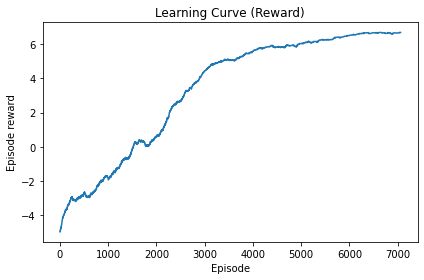

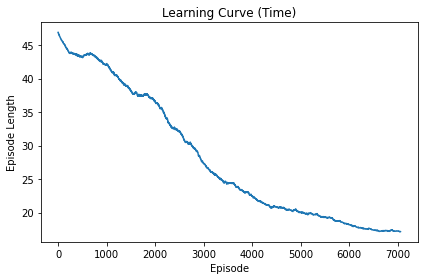

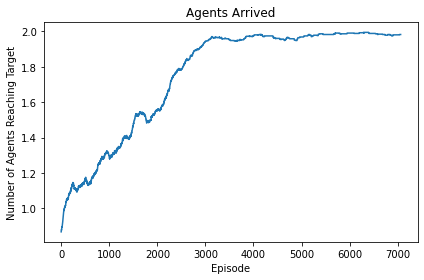

In [27]:
# PPO
smooth          = 500
reward_list_s   = np.convolve(ep_reward_mem, np.ones((smooth,))/smooth, mode='valid')
plt.figure()
plt.plot(range(len(reward_list_s)), np.array(reward_list_s))
plt.xlabel('Episode')
plt.ylabel('Episode reward')
plt.title("Learning Curve (Reward)")
plt.tight_layout()
plt.show()

training_time = np.convolve(training_time_mem, np.ones((smooth,))/smooth, mode='valid')
plt.figure()
plt.plot(range(len(training_time)), np.array(training_time))
plt.xlabel('Episode')
plt.ylabel('Episode Length')
plt.title("Learning Curve (Time)")
plt.tight_layout()
plt.show()

agents_arrived = np.convolve(n_agent_reached_mem, np.ones((smooth,))/smooth, mode='valid')
plt.figure()
plt.plot(range(len(agents_arrived)), np.array(agents_arrived))
plt.xlabel('Episode')
plt.ylabel('Number of Agents Reaching Target')
plt.title("Agents Arrived")
plt.tight_layout()
plt.show()

#### Analysis on performance

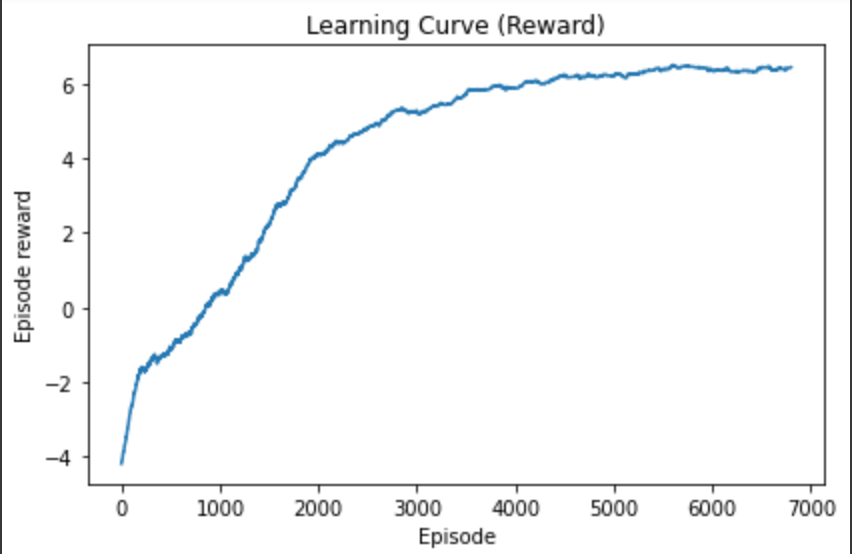

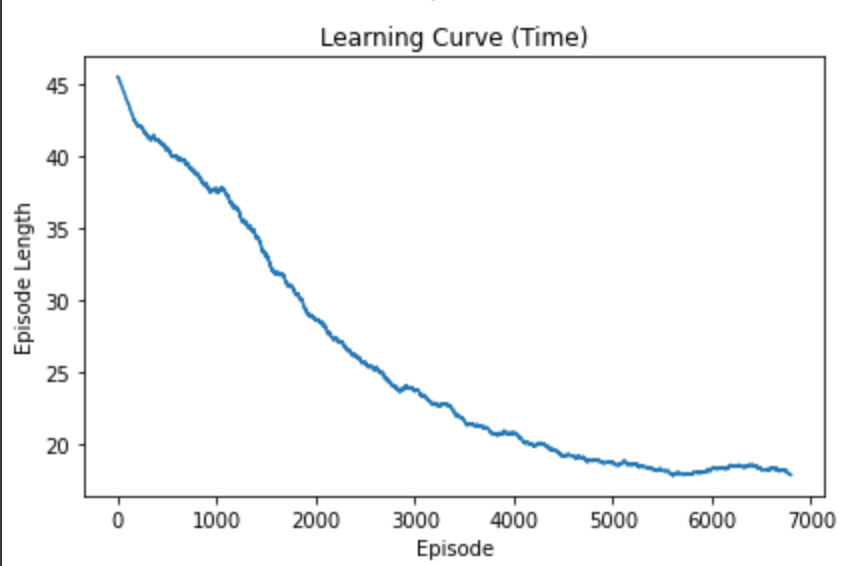

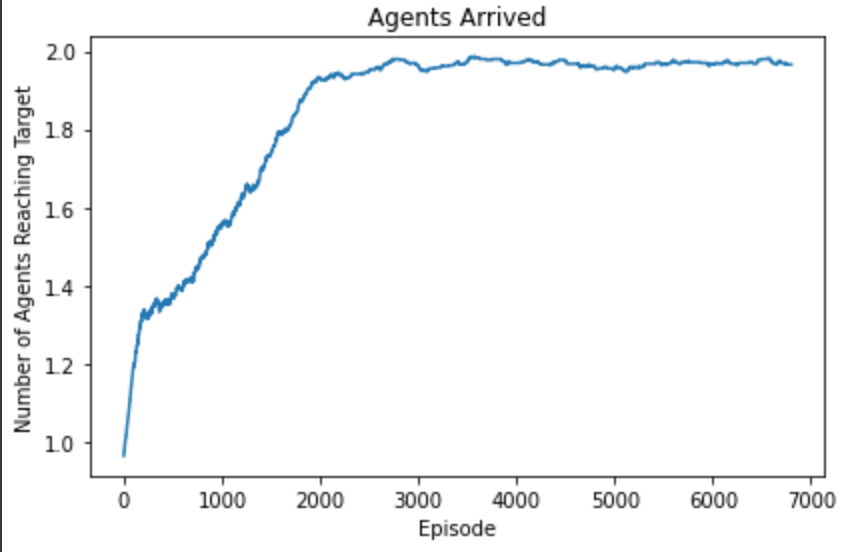

From the Agent Arrived graph, we can see that all 2 agents start to be able to arrive to their destination around 2000th episode. However, from the Learning curve (Time) graph, the time only become stable starting from around 5500th episode at about 17 steps with an overall reward of 6.1 reading from the Learning Curve (Reward) graph. This means that for the proximal policy optimization (PPO) algorithm in the Switch 2 case, the agents can only find their optimal path starting from around 5500th episode.


### TODO: Implement a Deep MARL Agent to Play Switch4-v0 (6 points)
Implement your own choice of any deep MARL algorithms to play the Switch4-v0 game.

**Requirements**

Same reuqiremnts as Switch2-v0 game. You can put emphasis on what differences between Switch2-v0 and Switch4-v0 and what improvements you have done.



#### Code for Playing Switch4-v0


In [28]:
# PPO
max_episode             = 100000
episode                 = 1
train                   = True
mean_scope              = 50

env                     = gym.make("Switch4-v0") # Use "Switch4-v0" for the Switch-4 game
agents                  = [PPOAgent(i) for i in range(env.n_agents)]
final_agent_pos         = {0: [0.0, 1.0], 1: [0.0, 0.0],
                           2: [1.0, 1.0], 3: [1.0, 0.0]}
solving_thershold       = 3.5*env.n_agents
ep_reward_mem           = []
training_time_mem       = []
n_agent_reached_mem     = []

# for episode in range(0, max_episode):
while train and episode < max_episode:
    ep_reward       = 0
    episode_t_step  = 0
    n_agent_reached = 0
    obs_n           = env.reset()
    done_n          = [False]*env.n_agents # [False for _ in range(env.n_agents)]

    while not all(done_n):
        actions                  = []
        action_log_probabilities = []

        for agent_idx in range(env.n_agents):
            # Append time step:
            obs_n[agent_idx].append(episode_t_step)
            # Collect actions:
            action, action_log_probability = agents[agent_idx].select_action(obs_n[agent_idx])
            
            actions.append(action.item())
            action_log_probabilities.append(action_log_probability.detach())
        
        # Use action to run the environment:
        next_obs_n, reward_n, done_n, info = env.step(actions)
        for agent_idx in range(env.n_agents):
            # Append time step:
            next_obs_n[agent_idx].append(episode_t_step)
            # Save to replay buffer + learn (QNetwork)
            agents[agent_idx].step(obs_n[agent_idx], actions[agent_idx], action_log_probabilities[agent_idx], reward_n[agent_idx], next_obs_n[agent_idx], done_n[agent_idx])

        # Update observation coordinate:
        for agent_idx in range(env.n_agents):
            obs_n[agent_idx] = next_obs_n[agent_idx][:2]
        
        episode_t_step  += 1
        ep_reward       += sum(reward_n)
        # env.render()
    for agent in range(env.n_agents):
        if final_agent_pos[agent] == next_obs_n[agent][0:2]:
            n_agent_reached += 1

    n_agent_reached_mem.append(n_agent_reached)
    training_time_mem.append(episode_t_step)
    
    if episode % 50 == 0:
        print(f"Agents reached: {n_agent_reached} with overall reward {ep_reward} at {episode} episode.")

    ep_reward_mem.append(ep_reward)
    if np.mean(ep_reward_mem[-mean_scope:]) > solving_thershold:
        print(f"Done in {episode} episodes.")
        train = False
    episode += 1
    env.close()

/usr/local/lib/python3.7/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:528: UserWarning: Using a target size (torch.Size([2000])) that is different to the input size (torch.Size([2000, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Agents reached: 0 with overall reward -19.999999999999993 at 50 episode.
Agents reached: 0 with overall reward -19.999999999999993 at 100 episode.
Agents reached: 0 with overall reward -19.999999999999993 at 150 episode.
Agents reached: 1 with overall reward -14.90000000000001 at 200 episode.
Agents reached: 0 with overall reward -19.999999999999993 at 250 episode.
Agents reached: 1 with overall reward -14.899999999999995 at 300 episode.
Agents reached: 1 with overall reward -14.900000000000011 at 350 episode.
Agents reached: 1 with overall reward -14.900000000000013 at 400 episode.
Agents reached: 0 with overall reward -19.999999999999993 at 450 episode.
Agents reached: 0 with overall reward -19.999999999999993 at 500 episode.
Agents reached: 0 with overall reward -19.999999999999993 at 550 episode.
Agents reached: 0 with overall reward -19.999999999999993 at 600 episode.
Agents reached: 2 with overall reward -9.800000000000002 at 650 episode.
Agents reached: 0 with overall reward -19

#### Plot the Learning Curve

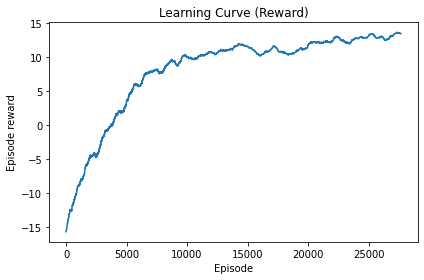

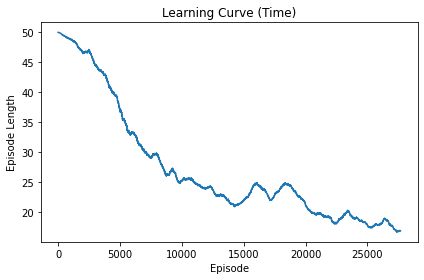

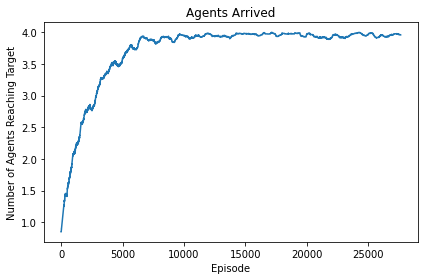

In [29]:
smooth          = 500
reward_list_s   = np.convolve(ep_reward_mem, np.ones((smooth,))/smooth, mode='valid')
plt.figure()
plt.plot(range(len(reward_list_s)), np.array(reward_list_s))
plt.xlabel('Episode')
plt.ylabel('Episode reward')
plt.title("Learning Curve (Reward)")
plt.tight_layout()
plt.show()

training_time = np.convolve(training_time_mem, np.ones((smooth,))/smooth, mode='valid')
plt.figure()
plt.plot(range(len(training_time)), np.array(training_time))
plt.xlabel('Episode')
plt.ylabel('Episode Length')
plt.title("Learning Curve (Time)")
plt.tight_layout()
plt.show()

agents_arrived = np.convolve(n_agent_reached_mem, np.ones((smooth,))/smooth, mode='valid')
plt.figure()
plt.plot(range(len(agents_arrived)), np.array(agents_arrived))
plt.xlabel('Episode')
plt.ylabel('Number of Agents Reaching Target')
plt.title("Agents Arrived")
plt.tight_layout()
plt.show()

#### Analysis on Performance

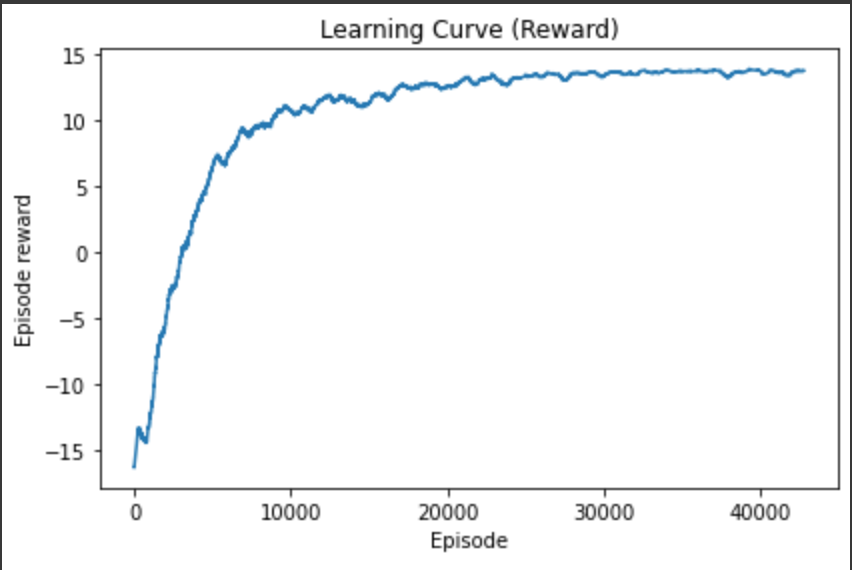

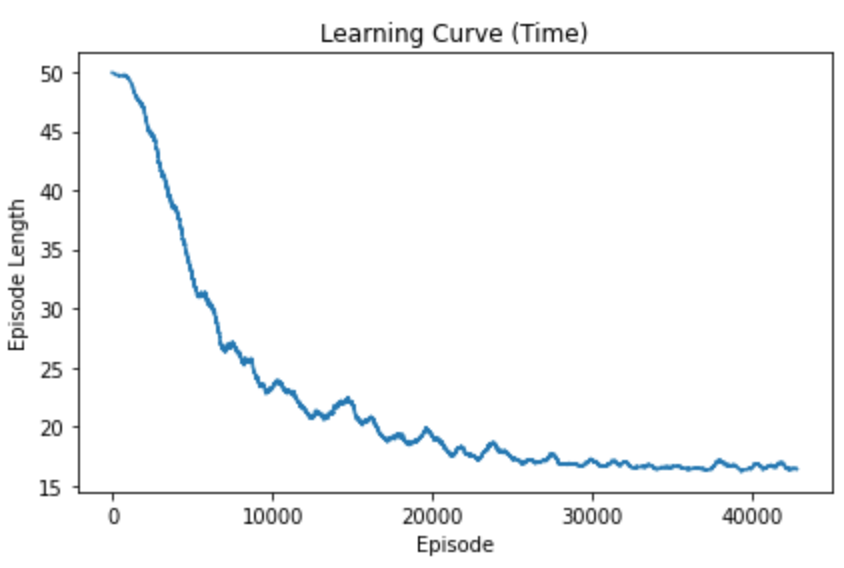

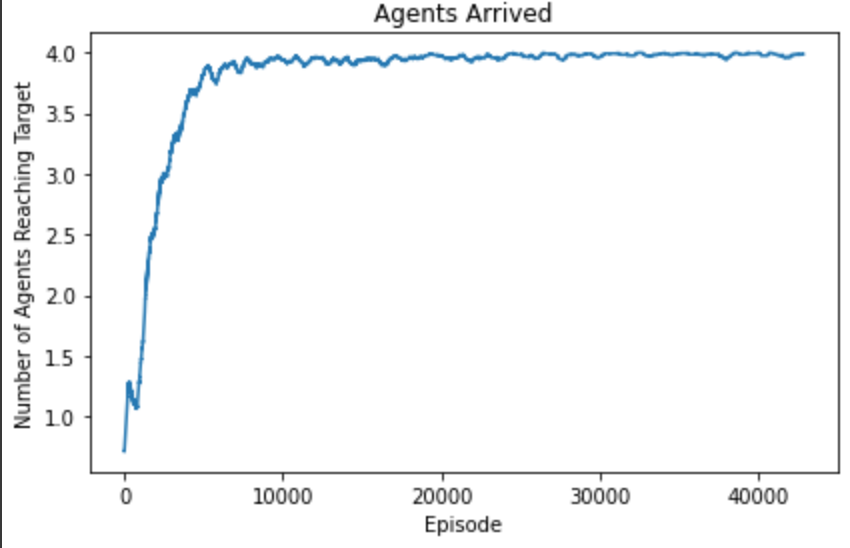

In the Switch 4 case, we can see that from the Agents Arrived graph, all 4 agents can arrive at their destination starting at around 7500 episodes, but the number of steps needed for all 4 agents to arrive only converge to 17 steps starting from around 28000th episode with an overall reward around 14. This implies that the Switch 4 problem is harder for the PPO algorithm


# Appendix 1

In [30]:
# Code for upper confidence bound board to narrow test

import  random
import  matplotlib
import  matplotlib.pyplot   as      plt
import  numpy               as      np
from    collections         import  defaultdict
from    functools           import  partial
from    abc                 import  ABCMeta, abstractmethod
from    copy                import  deepcopy

class StochasticGame():
    def __init__(self, episode_limit=5, good_branches=2, batch_size=None, **kwargs):
        # Define the agents
        self.n_agents = 2

        self.episode_limit = episode_limit

        # Define the internal state
        self.steps = 0

        r_matrix = [[1,1],[1,1]]
        self.payoff_values = [r_matrix for _ in range(self.episode_limit)]
        self.final_step_diff =[[1,1],[1,4]]

        self.branches = 4
        self.branch = 0

        self.n_actions = len(self.payoff_values[0])

        self.good_branches = good_branches

    def reset(self):
        """ Returns initial observations and states"""
        self.steps = 0
        self.branch = 0
        return self.get_obs()

    def step(self, actions):
        """ Returns reward, terminated, info """
        current_branch = 0
        if (actions[0], actions[1]) == (0,0):
            current_branch = 0
        if (actions[0], actions[1]) == (0,1):
            current_branch = 1
        if (actions[0], actions[1]) == (1,0):
            current_branch = 2
        if (actions[0], actions[1]) == (1,1):
            current_branch = 3

        if self.steps == 0:
            self.branch = current_branch

        info = {}

        info["good_payoff"] = 0
        info["branch"] = self.branch

        if self.good_branches == 4:
            reward = 1 if self.branch == current_branch else 0 # Need to follow your branch
        elif self.good_branches == 2:
            reward = 1 if self.branch in [0,3] and self.branch == current_branch else 0
        else:
            raise Exception("Environment not setup to handle {} good branches".format(self.good_branches))

        if self.episode_limit > 1 and self.steps == self.episode_limit - 1 and self.branch == 0:
            info["good_payoff"] = 1
            reward = self.final_step_diff[actions[0]][actions[1]]

        self.steps += 1

        if self.steps < self.episode_limit and reward > 0:
            terminated = False
        else:
            terminated = True

        info["episode_limit"] = False

        # How often the joint-actions are taken
        info["action_00"] = 0
        info["action_01"] = 0
        info["action_10"] = 0
        info["action_11"] = 0
        if (actions[0], actions[1]) == (0, 0):
            info["action_00"] = 1
        if (actions[0], actions[1]) == (0, 1):
            info["action_01"] = 1
        if (actions[0], actions[1]) == (1, 0):
            info["action_10"] = 1
        if (actions[0], actions[1]) == (1, 1):
            info["action_11"] = 1

        return self.get_obs(), [reward] * 2, [terminated] * 2, info

    def get_obs(self):
        """ Returns all agent observations in a list """
        one_hot_step = [0] * (self.episode_limit + 1 + self.branches)
        one_hot_step[self.steps] = 1
        one_hot_step[self.episode_limit + 1 + self.branch] = 1
        return [tuple(one_hot_step) for _ in range(self.n_agents)]

    def get_obs_agent(self, agent_id):
        """ Returns observation for agent_id """
        return self.get_obs()[agent_id]

    def get_obs_size(self):
        """ Returns the shape of the observation """
        return len(self.get_obs_agent(0))

    def get_state(self):
        return self.get_obs_agent(0)

    def get_state_size(self):
        """ Returns the shape of the state"""
        return self.get_obs_size()

    def get_total_actions(self):
        """ Returns the total number of actions an agent could ever take """
        return self.n_actions

def sample(pi):
  return np.random.choice(pi.size, size=1, p=pi)[0]

def normalize(pi):
    minprob = np.min(pi)
    if minprob < 0.0:
        pi -= minprob
    pi /= np.sum(pi)

class BaseQAgent:
    def __init__(self, name, action_num=2, phi=0.01, gamma=0.95, episilon=0.1, **kwargs):
        self.name       = name
        self.action_num = action_num
        self.episilon   = episilon
        self.gamma      = gamma
        self.phi        = phi
        self.epoch      = 0
        self.Q          = None
        self.pi         = defaultdict(partial(np.random.dirichlet, [1.0] * self.action_num))

    def done(self):
        pass

    def act(self, observation, exploration=False):
        if exploration and random.random() < self.episilon:
            return random.randint(0, self.action_num - 1)
        else:
            return sample(self.pi[observation])

    @abstractmethod
    def update(self, observation, action, reward, next_observation, done):
        pass

    @abstractmethod
    def update_policy(self, observation, action):
        pass

def rollout(env, agents, exploration=True, max_iter=5000, log_episode_interval=100, verbose=False):
    history_reward          = []
    state_n                 = env.reset()
    episode_reward          = 0
    episode_count           = 0
    recorded_episodes       = []
    recorded_episode_reward = []
    for i in range(max_iter):
        actions                             = np.array([agent.act(state, exploration) for state, agent in zip(state_n, agents)])
        next_state_n, reward_n, done_n, _   = env.step(actions)
        episode_reward                     += np.mean(reward_n)
        for j, (state, reward, next_state, done, agent) in enumerate(zip(state_n, reward_n, next_state_n, done_n, agents)):
            agent.update(state, actions[j], reward, next_state, done)
        state_n = next_state_n
        if np.all(done_n):
            state_n = env.reset()
            history_reward.append(episode_reward)
            episode_reward = 0
            episode_count += 1
            if (i + 1) %  log_episode_interval == 0:
                recorded_episodes.append(i)
                episodes_mean_reward = np.mean(history_reward)
                recorded_episode_reward.append(episodes_mean_reward)
                history_reward = []
                if verbose:
                    print('Iterations {}, Reward {}'.format(i, episodes_mean_reward))
    return recorded_episodes, recorded_episode_reward

# You can write any code to implement your CoolAgent, please ouput
# action via the act(observation, exploration) method
class CoolAgent(BaseQAgent):
    def __init__(self, w, **kwargs):
        super().__init__('CoolAgent', **kwargs)
        self.Q              = defaultdict(partial(np.random.rand, self.action_num))     # Q value
        self.R              = defaultdict(partial(np.zeros, self.action_num))           # reward
        self.count_R        = defaultdict(partial(np.zeros, self.action_num))           # reward count
        self.count_action   = defaultdict(partial(np.zeros, self.action_num))           # N_t(a)
        self.explore_weight = w

    def done(self):
        self.R.clear()
        self.count_R.clear()

    def act(self, observation, exploration):
        if exploration:
            Q               = self.Q[observation]
            Explore_term    = self.explore_weight*np.sqrt(np.log(self.epoch)/self.count_action[observation])
            return np.argmax(Q + Explore_term)
        else:
            return sample(self.pi[observation])
        
    @abstractmethod
    def update(self, observation, action, reward, next_observation, done):
        self.count_R[observation][action]   += 1.0
        self.R[observation][action]         += (reward - self.R[observation][action]) / self.count_R[observation][action]
        Q                                    = self.Q[observation]
        V                                    = self.val(next_observation)
        
        if done:
            Q[action] = (1 - self.phi)*Q[action] + self.phi*(reward + self.gamma*V)
            self.done()
        else:
            Q[action] = (1 - self.phi)*Q[action] + self.phi*(reward + self.gamma*V)
        self.update_policy(observation, action) # Greedy policy
        self.count_action[observation][action]  += 1
        self.epoch                              += 1
    
    @abstractmethod
    def val(self, observation):
        v = np.max(self.Q[observation])
        return v

    @abstractmethod
    def update_policy(self, observation, action):
        # Greedy policy
        Q = self.Q[observation]
        self.pi[observation] = (Q == np.max(Q)).astype(np.double)
        self.pi[observation] = self.pi[observation] / np.sum(self.pi[observation])

# Feel Free to write code here to train and tune your cool agents, 
# and assign the trained agents to cool_agents at the end
# ########################################
# TODO: Your cool agent training code #############
agent_num           = 2
action_num          = 2
Exploration_weight  = [10,10.5,11,11.5,12,12.5,13,13.5,14,14.5,15]
Mean_test_reward    = []
Std_test_reward     = []

for w in Exploration_weight:
    print(f'Exploration weight: {w}')
    runs = 10
    # store data for each run
    train_cool_recorded_episodes_log = []
    train_cool_recorded_episode_reward_log = []
    test_cool_recorded_episode_reward_log = []

    for i in range(runs):
    ##################################### INITIALISATION ####################################
        agents  = []
        env     = StochasticGame()
        for i in range(agent_num):
            agent = CoolAgent(w, action_num=action_num)
            agents.append(agent)

        ####################################### TRAINING #######################################
        train_cool_recorded_episodes, train_cool_recorded_episode_reward = rollout(env=env, 
                                                                        agents=agents, 
                                                                        exploration=True, 
                                                                        max_iter=70000)
        # store result for every run
        train_cool_recorded_episodes_log.append(train_cool_recorded_episodes)
        train_cool_recorded_episode_reward_log.append(train_cool_recorded_episode_reward)
        
        ####################################### TESTING #######################################
        #########################################
        cool_agents = agents
        # Cool agent evaluation code, please do not change
        cool_env = StochasticGame()
        test_cool_recorded_episodes, test_cool_recorded_episode_reward = rollout(env=cool_env, 
                                                                                agents=cool_agents, 
                                                                                exploration=False, 
                                                                                max_iter=10, 
                                                                                log_episode_interval=1)
        # store result for every run
        test_cool_recorded_episode_reward_log.append(np.mean(test_cool_recorded_episode_reward))
        
    Mean_test_reward.append(np.mean(test_cool_recorded_episode_reward_log))
    Std_test_reward.append(np.std(test_cool_recorded_episode_reward_log))

print(f'Results:')
for i in range(0, len(Mean_test_reward)):
    print(f'Cool agent\'s test reward using exloration weight {Exploration_weight[i]} is (average over 10 runs):', Mean_test_reward[i], 'with std:', Std_test_reward[i])

Exploration weight: 10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:204: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:204: RuntimeWarning: invalid value encountered in sqrt
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:204: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:204: RuntimeWarning: divide by zero encountered in true_divide


KeyboardInterrupt: ignored